# Model K-means

This Jupyter notebook is used to:

1. Run PCA.
2. Run K-means.
3. Visualize results.

## 0. Load the data

In [7]:
import pandas as pd
import os

# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'final.csv'
print(INPUT_CSV)

data = pd.read_csv(INPUT_CSV, low_memory=False)
selected_df = data.copy()
selected_df.head()

/home/sramkova/diploma_thesis_data/cicids2017/attacks/0_tuesday/ftp_patator/final.csv


originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            0.53453           0.77061          0.00561              0.00000   
1            0.53453           0.10058          0.37616              0.00005   
2            0.53453           0.23016          0.23842              0.02231   
3            0.53453           0.85944          0.10949              0.00000   
4            0.53453           0.23016          0.61636              0.02235   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.75719                0.00000                   0.00010   
1            0.76752                0.00080                   0.00133   
2            0.76718                0.00198                   0.00791   
3            0.00204                0.00078                   0.00120   
4            0.76848                0.00198                   0.00766   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.00022            0.00742                0.00000  ...   
1               0.00239            0.00742                0.00012  ...   
2               0.02106            0.00742                0.02119  ...   
3               0.00282            0.00218                0.00000  ...   
4               0.02019            0.00742                0.01943  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol  service  conn_state  \
0           0                       0       tcp     none          SH   
1        1915                       6       tcp      ssl          SF   
2      290589                     160       tcp      ssl          SF   
3           0                       0       udp      dns          S0   
4      266707                     152       tcp      ssl          SF   

        orig_p_cat       resp_p_cat  attacker_label  victim_label  \
0  orig_reg_or_dyn         resp_443              No            No   
1  orig_reg_or_dyn         resp_443              No            No   
2  orig_reg_or_dyn         resp_443              No            No   
3  orig_well_known  resp_well_known              No            No   
4  orig_reg_or_dyn         resp_443              No            No   

                     timestamp  
0   2017-07-04T13:05:10.09719Z  
1  2017-07-04T13:16:16.943791Z  
2  2017-07-04T13:12:09.069054Z  
3  2017-07-04T13:08:17.049633Z  
4  2017-07-04T13:23:29.209443Z  

[5 rows x 300 columns]

In [2]:
# shuffle 
selected_df = selected_df.sample(frac=1).reset_index(drop=True)
selected_df.head(5)

originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            0.00000           0.85944          0.29067              0.00534   
1            0.53453           0.85944          0.14935              0.00003   
2            0.53453           0.85944          0.47657              0.00000   
3            0.53453           0.28241          0.05941              0.00300   
4            0.53453           0.30162          0.17518              0.00674   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.90445                0.00015                   0.00083   
1            0.87260                0.00011                   0.00017   
2            0.43987                0.00008                   0.00014   
3            0.78470                0.00081                   0.00123   
4            0.61587                0.01264                   0.01370   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.00239            0.00019                0.00001  ...   
1               0.00043            0.00074                0.00002  ...   
2               0.00043            0.00074                0.00001  ...   
3               0.00195            0.00742                0.00041  ...   
4               0.00456            0.00742                0.00131  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol  service  conn_state  \
0        1056                      17       tcp      ftp          SF   
1         264                       2       udp      dns          SF   
2         152                       2       udp      dns          SF   
3        5736                       7       tcp      ssl          SF   
4       18715                      25       tcp      ssl          SF   

        orig_p_cat  resp_p_cat  attacker_label  victim_label  \
0  orig_reg_or_dyn     resp_21             Yes           Yes   
1  orig_reg_or_dyn     resp_53              No            No   
2  orig_reg_or_dyn     resp_53              No           Yes   
3  orig_reg_or_dyn    resp_443              No            No   
4  orig_reg_or_dyn    resp_443              No            No   

                     timestamp  
0  2017-07-04T13:13:43.094941Z  
1  2017-07-04T13:09:28.772318Z  
2  2017-07-04T13:19:17.637392Z  
3  2017-07-04T13:06:46.910086Z  
4  2017-07-04T13:10:15.262634Z  

[5 rows x 300 columns]

In [4]:
print('Dimension data: {} rows and {} columns'.format(len(selected_df), len(selected_df.columns)))

Dimension data: 21568 rows and 300 columns


In [5]:
# Numerical
pd.set_option('display.max_columns', None)
selected_df.describe()

originated_ip_num  responded_ip_num  connection.time  \
count        21568.00000       21568.00000      21568.00000   
mean             0.50931           0.73600          0.43839   
std              0.11341           0.23925          0.29346   
min              0.00000           0.00000          0.00000   
25%              0.53453           0.77061          0.17921   
50%              0.53453           0.85944          0.37603   
75%              0.53453           0.85944          0.67348   
max              1.00000           1.00000          1.00000   

       connection.duration  connection.orig_p  connection.orig_bytes  \
count          21568.00000        21568.00000            21568.00000   
mean               0.00928            0.73425                0.00079   
std                0.02891            0.27208                0.00981   
min                0.00000            0.00000                0.00000   
25%                0.00001            0.68920                0.00007   
50%                0.00003            0.81880                0.00010   
75%                0.00303            0.92406                0.00041   
max                1.00000            1.00000                1.00000   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
count               21568.00000           21568.00000        21568.00000   
mean                    0.00128               0.00203            0.00312   
std                     0.01100               0.01295            0.02304   
min                     0.00000               0.00000            0.00000   
25%                     0.00013               0.00043            0.00074   
50%                     0.00017               0.00043            0.00074   
75%                     0.00084               0.00217            0.00194   
max                     1.00000               1.00000            1.00000   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
count            21568.00000               21568.00000           21568.00000   
mean                 0.00075                   0.00077               0.00138   
std                  0.01241                   0.01240               0.01266   
min                  0.00000                   0.00000               0.00000   
25%                  0.00001                   0.00001               0.00013   
50%                  0.00001                   0.00002               0.00025   
75%                  0.00004                   0.00008               0.00100   
max                  1.00000                   1.00000               1.00000   

        dns_count   ssh_count  http_count   ssl_count  files_count  \
count 21568.00000 21568.00000 21568.00000 21568.00000  21568.00000   
mean      0.61387     0.00362     0.05420     0.19047      0.01647   
std       0.48687     0.06003     0.22642     0.39268      0.04572   
min       0.00000     0.00000     0.00000     0.00000      0.00000   
25%       0.00000     0.00000     0.00000     0.00000      0.00000   
50%       1.00000     0.00000     0.00000     0.00000      0.00000   
75%       1.00000     0.00000     0.00000     0.00000      0.00000   
max       1.00000     1.00000     1.00000     1.00000      1.00000   

       orig_orig_total  orig_orig_connection.time_mean  \
count      21568.00000                     21568.00000   
mean           0.43468                         0.43544   
std            0.26730                         0.29366   
min            0.00000                         0.00000   
25%            0.22097                         0.14988   
50%            0.34738                         0.36437   
75%            0.66479                         0.68184   
max            1.00000                         1.00000   

       orig_orig_connection.duration_mean  \
count                         21568.00000   
mean                              0.21570   
std                               0.13512   
min                               0.00000   
25%  

In [6]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       #'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       #'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

# categorical
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [7]:
def load_col_names(list_name, file_path):
    f = open(file_path, 'r')
    for ohe_col in f:
        list_name.append(ohe_col.strip())
    f.close()
    # print(list_name)

In [ ]:
OHE_PROTO_CAT_COLS = []
OHE_SERVICE_CAT_COLS = []
OHE_CONN_STATE_CAT_COLS = []
ORIG_ORIG_OHE_CAT_COLS = []
ORIG_RESP_OHE_CAT_COLS = []
RESP_ORIG_OHE_CAT_COLS = []
RESP_RESP_OHE_CAT_COLS = []

load_col_names(OHE_PROTO_CAT_COLS,  PREFIX_PATH + 'ohe_proto_cat_cols.txt')
load_col_names(OHE_SERVICE_CAT_COLS,  PREFIX_PATH + 'ohe_service_cat_cols.txt')
load_col_names(OHE_CONN_STATE_CAT_COLS,  PREFIX_PATH + 'ohe_conn_state_cat_cols.txt')
load_col_names(ORIG_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'orig_orig_categorical_cols.txt')
load_col_names(ORIG_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'orig_resp_categorical_cols.txt')
load_col_names(RESP_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'resp_orig_categorical_cols.txt')
load_col_names(RESP_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'resp_resp_categorical_cols.txt')

In [9]:
df = selected_df.filter(CONN_NUMERICAL_COLS + 
                         CONN_APP_STATS + 
                         OHE_ORIG_P_CAT_COLS + 
                         OHE_RESP_P_CAT_COLS + 
                         OHE_PROTO_CAT_COLS + 
                         OHE_SERVICE_CAT_COLS + 
                         OHE_CONN_STATE_CAT_COLS + 
                         
                         # originator neighbourhood
                         ORIG_ORIG_NUMERICAL_COLS + 
                         ORIG_ORIG_PORTS_COLS + 
                         ORIG_ORIG_APP_STATS_COLS + 
                         ['orig_orig_similar_conns_count'] + 
                         # originator categorical neighbourhood 
                         ORIG_ORIG_OHE_CAT_COLS + 
                         
                         # originator neighbourhood 2 
                         ORIG_RESP_NUMERICAL_COLS + 
                         ORIG_RESP_PORTS_COLS + 
                         ORIG_RESP_APP_STATS_COLS + 
                         ['orig_resp_similar_conns_count'] + 
                         # originator categorical neighbourhood 2
                         ORIG_RESP_OHE_CAT_COLS + 
                         
                         # responder neighbourhood
                         RESP_ORIG_NUMERICAL_COLS + 
                         RESP_ORIG_PORTS_COLS + 
                         RESP_ORIG_APP_STATS_COLS + 
                         ['resp_orig_similar_conns_count'] + 
                         # responder categorical neighbourhood 
                         RESP_ORIG_OHE_CAT_COLS + 
                         
                         # responder neighbourhood 2
                         RESP_RESP_NUMERICAL_COLS + 
                         RESP_RESP_PORTS_COLS + 
                         RESP_RESP_APP_STATS_COLS + 
                         ['resp_resp_similar_conns_count'] + 
                         # responder categorical neighbourhood 2
                         RESP_RESP_OHE_CAT_COLS, axis=1)

In [10]:
df.head()

connection.time  connection.duration  connection.orig_p  \
0          0.29067              0.00534            0.90445   
1          0.14935              0.00003            0.87260   
2          0.47657              0.00000            0.43987   
3          0.05941              0.00300            0.78470   
4          0.17518              0.00674            0.61587   

   connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                0.00015               0.00239            0.00019   
1                0.00011               0.00043            0.00074   
2                0.00008               0.00043            0.00074   
3                0.00081               0.00195            0.00742   
4                0.01264               0.00456            0.00742   

   connection.resp_bytes  connection.resp_pkts  dns_count  ssh_count  \
0                0.00001               0.00213    0.00000    0.00000   
1                0.00002               0.00025    1.00000    0.00000   
2                0.00001               0.00025    1.00000    0.00000   
3                0.00041               0.00088    0.00000    0.00000   
4                0.00131               0.00313    0.00000    0.00000   

   http_count  ssl_count  files_count  orig_p_cat_orig_reg_or_dyn  \
0     0.00000    0.00000      0.00000                           1   
1     0.00000    0.00000      0.00000                           1   
2     0.00000    0.00000      0.00000                           1   
3     0.00000    1.00000      0.14815                           1   
4     0.00000    1.00000      0.07407                           1   

   orig_p_cat_orig_well_known  resp_p_cat_resp_123  resp_p_cat_resp_21  \
0                           0                    0                   1   
1                           0                    0                   0   
2                           0                    0                   0   
3                           0                    0                   0   
4                           0                    0                   0   

   resp_p_cat_resp_22  resp_p_cat_resp_443  resp_p_cat_resp_53  \
0                   0                    0                   0   
1                   0                    0                   1   
2                   0                    0                   1   
3                   0                    1                   0   
4                   0                    1                   0   

   resp_p_cat_resp_80  resp_p_cat_resp_dyn  resp_p_cat_resp_reg  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   0                    0                    0   
3                   0                    0                    0   
4                   0                    0                    0   

   resp_p_cat_resp_well_known  connection.proto_icmp  connection.proto_tcp  \
0                           0                      0                     1   
1                           0                      0                     0   
2                           0                      0                     0   
3                           0                      0                     1   
4                           0                      0                     1   

   connection.proto_udp  connection.service_dce_rpc  connection.service_dns  \
0                     0                           0                       0   
1                     1                           0                       1   
2                     1                           0                       1   
3                     0                           0                       0   
4                     0                           0                       0   

   connection.service_ftp  connection.service_ftp-data  \
0                       1                            0   
1                       0                            0   
2   

In [11]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'dns_count',
       'ssh_count',
       ...
       'resp_resp_connection.conn_state_mode_REJ',
       'resp_resp_connection.conn_state_mode_RSTO',
       'resp_resp_connection.conn_state_mode_RSTR',
       'resp_resp_connection.conn_state_mode_S0',
       'resp_resp_connection.conn_state_mode_S1',
       'resp_resp_connection.conn_state_mode_S2',
       'resp_resp_connection.conn_state_mode_S3',
       'resp_resp_connection.conn_state_mode_SF',
       'resp_resp_connection.conn_state_mode_SH',
       'resp_resp_connection.conn_state_mode_SHR'],
      dtype='object', length=823)

## 1. Dimension Reduction (PCA)

In [12]:
from sklearn.decomposition import PCA

n_components = len(df.columns)
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [13]:
pca_X = pca.fit_transform(df)
pca_X = pd.DataFrame(data=pca_X)

print(f"Variance Explained by all {n_components} principal components: {sum(pca.explained_variance_ratio_)}")

Variance Explained by all 823 principal components: 1.0000000000000002


In [14]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

n_components = [150, 10, 7, 5, 2]

for n in n_components:
    print('Variance Captured by First {:3} Principal Components: {}'.format(n, importanceOfPrincipalComponents.loc[:,0:n+1].sum(axis=1).values))
print('Variance Captured by the First Principal Component:  {}'.format(importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values))

Variance Captured by First 150 Principal Components: [1.]
Variance Captured by First  10 Principal Components: [0.94721352]
Variance Captured by First   7 Principal Components: [0.9240524]
Variance Captured by First   5 Principal Components: [0.90048977]
Variance Captured by First   2 Principal Components: [0.83713632]
Variance Captured by the First Principal Component:  [0.6885857]


In [15]:
variance_ratios = pca.explained_variance_ratio_
df_cols = df.columns

for i in range(len(variance_ratios)):
    if round(variance_ratios[i], 8) > 0:
        print('Variance of {:42}: {:.8f}'.format(df_cols[i], variance_ratios[i]))

Variance of connection.time                           : 0.39479254
Variance of connection.duration                       : 0.29379316
Variance of connection.orig_p                         : 0.11314734
Variance of connection.orig_bytes                     : 0.03540328
Variance of connection.orig_pkts                      : 0.02836041
Variance of connection.resp_p                         : 0.01963068
Variance of connection.resp_bytes                     : 0.01536236
Variance of connection.resp_pkts                      : 0.01274939
Variance of dns_count                                 : 0.01081325
Variance of ssh_count                                 : 0.00968856
Variance of http_count                                : 0.00691048
Variance of ssl_count                                 : 0.00656209
Variance of files_count                               : 0.00532397
Variance of orig_p_cat_orig_reg_or_dyn                : 0.00490376
Variance of orig_p_cat_orig_well_known                : 0.0038

## 2. K-means

In [16]:
from datetime import datetime
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html#sklearn.cluster.k_means
# https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c
from sklearn.cluster import KMeans

# Choose optimal K using Elbow method
score = []
inertia = []
print_info = []
computed_clusters = []
computed_clusters_fitted = []

print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
for cluster in range(1, 25):
    try:
        km = KMeans(
            n_clusters=cluster, init='random',
            n_init=10, max_iter=300, 
            tol=1e-04, random_state=0
        )
        km_fitted = km.fit(pca_X)
        y_km = km.fit_predict(pca_X)
        computed_clusters.append(km)
        computed_clusters_fitted.append(km_fitted)
        score.append(km.score(pca_X))
        inertia.append(km.inertia_)
        print_str = 'Cluster initiation: {:2} ({})'.format(cluster, datetime.now().strftime("%H:%M:%S"))
        print_info.append(print_str)
        print(print_str)
    except:
        break
print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')

Start at 00:04:11.
Cluster initiation:  1 (00:04:13)
Cluster initiation:  2 (00:04:16)
Cluster initiation:  3 (00:04:21)
Cluster initiation:  4 (00:04:28)
Cluster initiation:  5 (00:04:35)
Cluster initiation:  6 (00:04:42)
Cluster initiation:  7 (00:04:51)
Cluster initiation:  8 (00:05:03)
Cluster initiation:  9 (00:05:14)
Cluster initiation: 10 (00:05:22)
Cluster initiation: 11 (00:05:34)
Cluster initiation: 12 (00:05:45)
Cluster initiation: 13 (00:05:55)
Cluster initiation: 14 (00:06:04)
Cluster initiation: 15 (00:06:13)
Cluster initiation: 16 (00:06:21)
Cluster initiation: 17 (00:06:34)
Cluster initiation: 18 (00:06:48)
Cluster initiation: 19 (00:06:59)
Cluster initiation: 20 (00:07:09)
Cluster initiation: 21 (00:07:18)
Cluster initiation: 22 (00:07:27)
Cluster initiation: 23 (00:07:37)
Cluster initiation: 24 (00:07:52)
Done at 00:07:52.


In [17]:
score

[-935192.648756852,
 -571730.9296405306,
 -332001.62504836626,
 -238133.88161160817,
 -195526.59857360928,
 -171515.03930294333,
 -156167.13220641576,
 -151011.6734060907,
 -129728.90926822164,
 -125927.12947268435,
 -123961.00384404436,
 -111551.02331518132,
 -109567.76484814667,
 -94008.56227851665,
 -92068.21116850887,
 -89121.73778492931,
 -87423.1650799366,
 -81889.49642435656,
 -83095.68854810146,
 -82121.79460213169,
 -80928.67753476181,
 -77183.13045327856,
 -72237.08247872927,
 -72070.2323981198]

In [18]:
inertia

[935192.648756852,
 571730.9296405305,
 332001.62504836626,
 238133.88161160817,
 195526.59857360928,
 171515.03930294333,
 156167.13220641576,
 151011.67340609076,
 129728.90926822164,
 125927.12947268436,
 123961.00384404436,
 111551.02331518133,
 109567.76484814667,
 94008.56227851665,
 92068.21116850887,
 89121.73778492931,
 87423.1650799366,
 81889.49642435656,
 83095.68854810146,
 82121.79460213169,
 80928.6775347618,
 77183.13045327856,
 72237.08247872927,
 72070.2323981198]

In [19]:
df_cost = pd.DataFrame({'Cluster': range(1, len(computed_clusters) + 1), 'Cost': inertia})

In [20]:
df_cost

Cluster         Cost
0         1 935192.64876
1         2 571730.92964
2         3 332001.62505
3         4 238133.88161
4         5 195526.59857
5         6 171515.03930
6         7 156167.13221
7         8 151011.67341
8         9 129728.90927
9        10 125927.12947
10       11 123961.00384
11       12 111551.02332
12       13 109567.76485
13       14  94008.56228
14       15  92068.21117
15       16  89121.73778
16       17  87423.16508
17       18  81889.49642
18       19  83095.68855
19       20  82121.79460
20       21  80928.67753
21       22  77183.13045
22       23  72237.08248
23       24  72070.23240

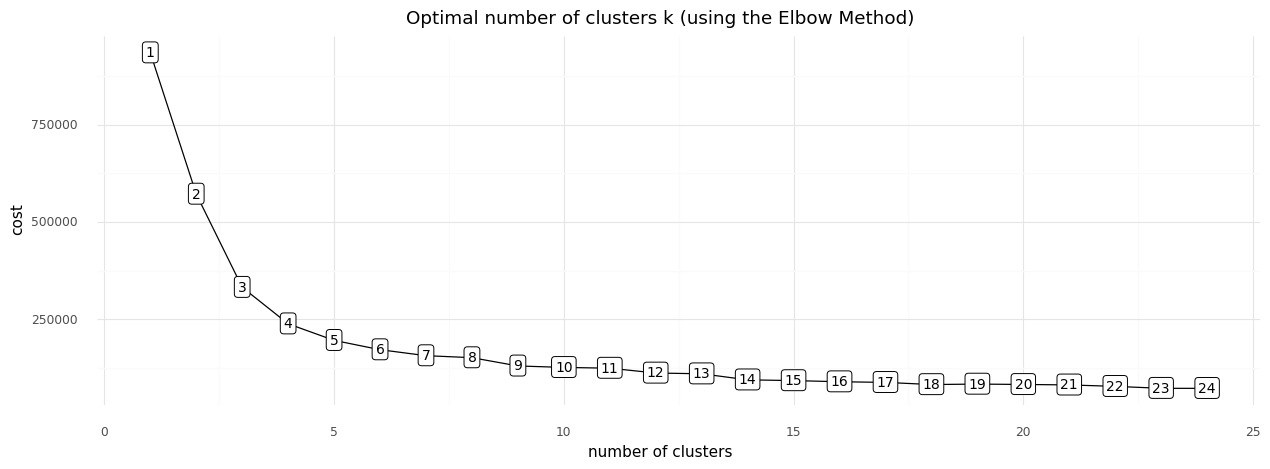

<ggplot: (8747532077234)>

In [21]:
# Import module for data visualization
from plotnine import *
import plotnine

plotnine.options.figure_size = (15, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of clusters k (using the Elbow Method)')+
    xlab('number of clusters')+
    ylab('cost')+
    theme_minimal()
)

In [22]:
# Fit the cluster
OPTIMAL_K = 4 

kmeans = computed_clusters[OPTIMAL_K]

In [23]:
# Cluster centorid
kmeans.cluster_centers_

array([[ 3.44605226e+00,  3.36094873e+00, -1.94660011e+00, ...,
         1.00372551e-18, -1.54691955e-18, -3.39398661e-17],
       [ 4.40267762e+00, -5.24346964e+00,  1.15027054e+00, ...,
        -9.30364546e-20,  2.91617459e-19, -3.42283822e-17],
       [-3.52817323e+00,  4.43809646e+00,  6.17063497e+00, ...,
         4.90755846e-18, -3.11198649e-18, -3.49137047e-17],
       [-4.54686528e+00, -9.08017851e-01, -7.35653555e-01, ...,
        -6.02126269e-19,  6.72169668e-19, -3.39070984e-17],
       [ 3.23229382e+00,  5.36674719e+00,  3.19230694e+00, ...,
        -3.01928244e-18,  7.32290240e-18, -3.38017643e-17]])

In [24]:
# Check the iteration of the clusters created
kmeans.n_iter_

7

In [25]:
# Check the cost of the clusters created
kmeans.inertia_

195526.59857360928

In [26]:
# Add cluster labels to original dataframe
pca_X['cluster'] = kmeans.labels_
pca_X['cluster_cat'] = pca_X['cluster']

# (groupby works only on category type)
pca_X['cluster_cat'] = pca_X['cluster_cat'].astype('category')

In [27]:
pca_X.head()

0        1        2        3        4        5        6        7  \
0 -3.24443  5.10937  6.51970 -3.07700  0.16734  0.17216  0.89790 -0.12721   
1 -4.69610 -0.98594 -1.08909  0.10778 -0.02799  0.02862 -0.03663 -1.05216   
2 -2.88130 -4.00792  0.90114 -1.33108 -0.72471  1.84765 -1.44378  2.99537   
3  3.66939  3.76953 -2.20711 -0.72549 -1.34423 -0.13405  0.08632 -0.96506   
4  3.65797  3.81917 -2.16158 -0.61862 -1.32748 -0.15488  0.31297 -0.19241   

         8        9       10       11       12       13       14       15  \
0 -0.40778  0.07779 -0.06293 -0.04657  0.01977 -0.00141  0.06970  0.05548   
1  0.22343  0.29664  0.13629  0.27075 -0.07969  0.02697 -0.02863  0.44002   
2  2.69689  1.04155  0.28099  0.01224 -2.03798  0.42456  0.33276  0.06816   
3  0.51809  0.23312  0.18843  0.14969 -0.14758 -0.10054  0.04964  0.37101   
4  0.49166 -0.06389  0.05204 -0.02201  0.04637  0.74786  0.27581 -0.24497   

        16       17       18       19       20       21       22       23  \
0  0.05632 -0.13196 -0.06924 -0.20121  0.20159  0.00612 -0.00280  0.00757   
1  0.81054  0.03069 -0.04050 -0.06491  0.10263  0.03347  0.21919 -0.00294   
2  0.06348 -0.32634 -0.00685 -0.18896  0.13401 -1.91606  0.01334 -0.34000   
3  0.72033  0.10276 -0.14816  0.00613 -0.14405  0.05160 -0.04604 -0.22545   
4 -0.66513 -0.04538  0.00036 -0.02068 -0.14715  0.05203 -0.18632  0.18192   

        24       25       26       27       28       29       30       31  \
0  0.00965 -0.00944 -0.04739 -0.00666 -0.03186 -0.00478  0.00761  0.02991   
1  0.04355  0.07515 -0.07418  0.11864  0.09241 -0.11109  0.00434 -0.06610   
2  0.00907  0.02261 -0.07598 -0.16633 -0.03894 -0.02795 -0.00128 -0.13711   
3  0.09651  0.06022 -0.02810 -0.24806 -0.00948 -0.03042  0.01399  0.06077   
4 -0.01742  0.01793  0.11073 -0.04384  0.06345 -0.17912  0.06763  0.09520   

        32       33       34       35       36       37       38       39  \
0 -0.07044 -0.00552 -0.08150 -0.07868  0.01328  0.03377  0.26393  0.39211   
1  0.12862  0.03522 -0.03405 -0.03237 -0.01843  0.03785 -0.09954 -0.00017   
2 -0.17189  0.00538  0.05022  0.06477 -0.06981 -0.01064  0.03342 -0.01890   
3  0.06556 -0.00685 -0.03065 -0.00832 -0.00743  0.01096 -0.01669  0.01491   
4 -0.04611  0.02794 -0.04237  0.00916 -0.03277  0.01616 -0.13057  0.05503   

        40       41       42       43       44       45       46       47  \
0 -0.26516 -0.03718 -0.15364  0.14385 -0.32933 -0.22926  0.23261  0.10615   
1 -0.00741  0.16990 -0.07637  0.03269 -0.03961  0.03416 -0.10441  0.01686   
2  0.04229 -0.07938  0.09459  0.04511 -0.03651 -0.10419 -0.11916 -0.07528   
3 -0.01993  0.06298  0.01814 -0.02910 -0.02376  0.01738 -0.05124 -0.00100   
4 -0.01579 -0.06623 -0.01134  0.03891 -0.00873 -0.01606 -0.07970 -0.01803   

        48       49       50       51       52       53       54       55  \
0  0.04464 -0.05049  0.04814 -0.01033 -0.00432  0.03245  0.02942  0.06216   
1  0.00902 -0.05507  0.04896  0.01281  0.03369 -0.00440 -0.00573  0.02648   
2 -0.10191  0.10791 -0.03097 -0.01192  0.10828 -0.03153 -0.01922 -0.02089   
3  0.02908  0.00800 -0.00716  0.01312  0.06288  0.03519 -0.01027 -0.03405   
4  0.08070 -0.04525  0.07786  0.04159 -0.00309 -0.01828  0.00054 -0.07151   

       56       57       58       59       60       61       62       63  \
0 0.04157 -0.00820 -0.09776  0.04258 -0.04149 -0.03321 -0.01820  0.00640   
1 0.07148  0.00417 -0.12419 -0.01368 -0.02805  0.02912  0.05884 -0.00528   
2 0.02984 -0.00956  0.04040  0.00008 -0.01494  0.01613 -0.00876 -0.00099   
3 0.00610 -0.01926 -0.02946  0.04817  0.02508 -0.08257  0.12581 -0.11464   
4 0.06668 -0.00319  0.06213  0.07266  0.01962 -0.02920  0.04131  0.05056   

        64       65       66       67       68       69       70       71  \
0  0.01534 -0.00337 -0.02402  0.02093  0.02663 -0.00474 -0.00003 -0.00612   
1 -0.00405  0.00540  0.03298 -0.00538 -0.00795  0.01088 -0.00454  0.00782   
2  0.03411 -0.01022 -0.05083 -0.01008  0.01382 -0.06565  0.00584 -0.03018   
3 -

In [28]:
pca_X.columns

Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,
       ...
                 815,           816,           817,           818,
                 819,           820,           821,           822,
           'cluster', 'cluster_cat'],
      dtype='object', length=825)

In [29]:
pca_X['cluster'].value_counts()

3    8676
0    5699
1    4587
2    1303
4    1303
Name: cluster, dtype: int64

## 3. Results

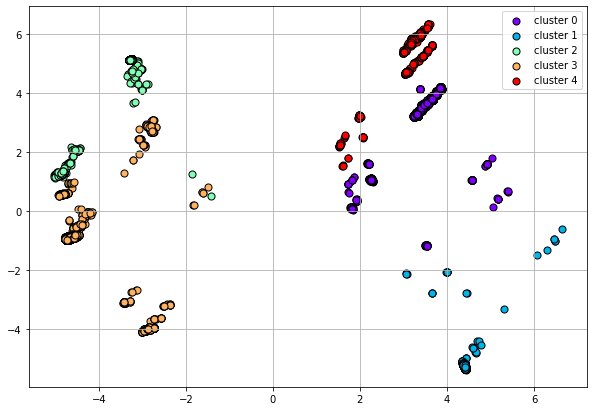

In [30]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import numpy as np

pca_X_array = np.array(pca_X)
# plt.rcParams["figure.figsize"] = (5.0,5.0) # https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib

plt.rcParams["figure.figsize"] = (10,7)
colors = mcm.rainbow(np.linspace(0, 1, OPTIMAL_K + 1))

# plot the clusters
for i in range(OPTIMAL_K + 1):   
    plt.scatter(
        pca_X_array[kmeans.labels_ == i, 0], pca_X_array[kmeans.labels_ == i, 1],
        s=50, c=[colors[i]], # warning if not array
        marker='o', edgecolor='black',
        label='cluster ' + str(i)
    )

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [31]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def subplot_3d_viz(fig, azim, elev, col_i):
    ax = fig.add_subplot(1, 3, col_i, projection='3d')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.azim = azim  # default -60
    ax.elev = elev  # default 30

    for i in pca_X['cluster'].unique(): 
        ax.scatter(pca_X_array[kmeans.labels_ == i, 0], 
                   pca_X_array[kmeans.labels_ == i, 1], 
                   pca_X_array[kmeans.labels_ == i, 2], 
                   c=[colors[i]],
                   edgecolor='black',
                   label='cluster ' + str(i));

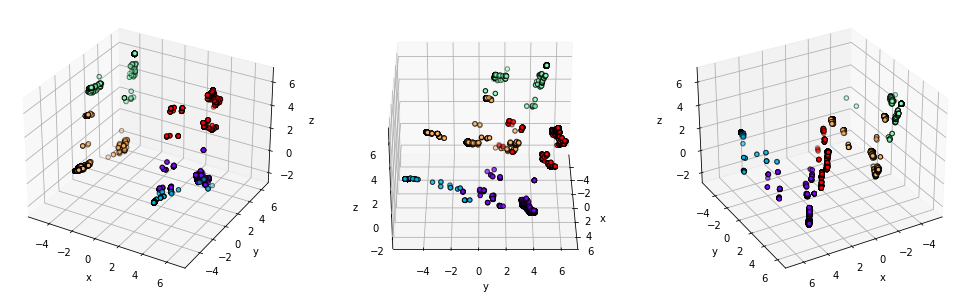

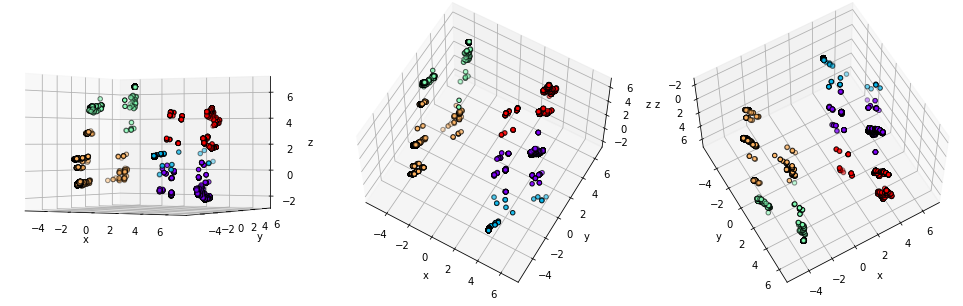

In [32]:
# azims = [_ for _ in range(-360, 360, 120)]
# print(azims)

azims = [-60, 0, 60]
elevs = [0, 60, 240]

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(azims)):
    subplot_3d_viz(fig, azims[i], 30, i+1)

plt.show()

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(elevs)):
    subplot_3d_viz(fig, -60, elevs[i], i+1)

plt.show()

In [33]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'attacker_label', 'victim_label']

In [34]:
# Cluster interpretation

# join dfs
labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)
result

0        1        2        3        4        5        6        7  \
0     -3.24443  5.10937  6.51970 -3.07700  0.16734  0.17216  0.89790 -0.12721   
1     -4.69610 -0.98594 -1.08909  0.10778 -0.02799  0.02862 -0.03663 -1.05216   
2     -2.88130 -4.00792  0.90114 -1.33108 -0.72471  1.84765 -1.44378  2.99537   
3      3.66939  3.76953 -2.20711 -0.72549 -1.34423 -0.13405  0.08632 -0.96506   
4      3.65797  3.81917 -2.16158 -0.61862 -1.32748 -0.15488  0.31297 -0.19241   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21563 -4.56417 -0.91616 -0.95881  0.14662 -0.04151  0.04028 -0.06235 -0.01134   
21564 -3.29016  5.11313  6.54125 -3.09922  0.15083  0.19086  0.89331  0.02586   
21565  4.42128 -5.29752  1.16495 -0.20074 -0.06317 -0.03223  0.04822 -0.41828   
21566 -4.55621 -0.83465 -0.94877  0.20931 -0.08554  0.05416 -0.06864  0.74740   
21567 -4.72325 -0.99388 -1.08804  0.12139 -0.03701  0.03520 -0.05510 -1.01862   

             8        9       10       11       12       13       14       15  \
0     -0.40778  0.07779 -0.06293 -0.04657  0.01977 -0.00141  0.06970  0.05548   
1      0.22343  0.29664  0.13629  0.27075 -0.07969  0.02697 -0.02863  0.44002   
2      2.69689  1.04155  0.28099  0.01224 -2.03798  0.42456  0.33276  0.06816   
3      0.51809  0.23312  0.18843  0.14969 -0.14758 -0.10054  0.04964  0.37101   
4      0.49166 -0.06389  0.05204 -0.02201  0.04637  0.74786  0.27581 -0.24497   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21563 -0.26682 -0.26287  0.03971 -0.06913 -0.02083 -0.42970 -0.11937  0.05279   
21564 -0.50294 -0.02892 -0.06919 -0.10090  0.03414 -0.04917  0.04341  0.05561   
21565 -0.02947  0.06675 -0.00091  0.05187 -0.00745  0.08014 -0.01033  0.04666   
21566 -0.72718 -0.86675 -0.00700 -0.37108  0.13081 -0.54472 -0.26661  0.02964   
21567  0.22447  0.28375  0.13665  0.27580 -0.08790  0.00899 -0.02530  0.42048   

            16       17       18       19       20       21       22       23  \
0      0.05632 -0.13196 -0.06924 -0.20121  0.20159  0.00612 -0.00280  0.00757   
1      0.81054  0.03069 -0.04050 -0.06491  0.10263  0.03347  0.21919 -0.00294   
2      0.06348 -0.32634 -0.00685 -0.18896  0.13401 -1.91606  0.01334 -0.34000   
3      0.72033  0.10276 -0.14816  0.00613 -0.14405  0.05160 -0.04604 -0.22545   
4     -0.66513 -0.04538  0.00036 -0.02068 -0.14715  0.05203 -0.18632  0.18192   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21563  0.15983 -0.01302 -0.01846 -0.03951  0.04856 -0.04789  0.19252  0.26391   
21564  0.07204 -0.11868 -0.06259 -0.17699  0.18863 -0.04273  0.13087  0.06288   
21565  0.03972  0.02883  0.00990  0.04594 -0.05455  0.00659 -0.03359 -0.02759   
21566  0.32608  0.10519 -0.10351  0.13850 -0.27667 -0.06636 -0.99637 -0.38885   
21567  0.76055  0.01478 -0.03262 -0.09602  0.13469  0.00411  0.27420  0.06801   

            24       25       26       27       28       29       30       31  \
0      0.00965 -0.00944 -0.04739 -0.00666 -0.03186 -0.00478  0.00761  0.02991   
1      0.04355  0.07515 -0.07418  0.11864  0.09241 -0.11109  0.00434 -0.06610   
2      0.00907  0.02261 -0.07598 -0.16633 -0.03894 -0.02795 -0.00128 -0.13711   
3      0.09651  0.06022 -0.02810 -0.24806 -0.00948 -0.03042  0.01399  0.06077   
4     -0.01742  0.01793  0.11073 -0.04384  0.06345 -0.17912  0.06763  0.09520   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21563 -0.07389  0.02745  0.06905 -0.08642  0.08596 -0.10855  0.03272  0.01445   
21564 -0.02974 -0.04493 -0.02973 -0.00284 -0.02906  0.01592  0.00711  0.03446   
21565  0.00549  0.00043  0.00731 -0.05874 -0.03205  0.02807 -0.01118  0.01687   
21566 -0.02987 -0.08821  0.11171  0.21988 -0.00339  0.20604 -0.01797 -0.03771   
21567  0.03457  0.08384 -0.05823  0.13483  0.09441 -0.12598  0.00153 -0.05327   

            32       33       34       35       36       37       38       39  \
0     -0.07044 -0.00552 -0.08150 -0.0786

In [36]:
def print_df_func(df, col, func):
    if func == 'count':
        print(df[col].value_counts())
        print('')
    elif func == 'mean':
        col_mean = df[col].mean()
        print(str(col) + ' mean = ' + str(col_mean))
    elif func == 'median':
        col_median = df[col].median()
        print(str(col) + ' median = ' + str(col_median))
    elif func == 'min':
        col_min = df[col].min()
        print(str(col) + ' min = ' + str(col_min))
    elif func == 'max':
        col_max = df[col].max()
        print(str(col) + ' max = ' + str(col_max))
        print('')

In [37]:
print('Time:')
print_df_func(result, 'timestamp', 'min')
print_df_func(result, 'timestamp', 'max')

Time:
timestamp min = 2017-07-04T13:05:00.001203Z
timestamp max = 2017-07-04T13:34:59.612987Z



In [38]:
plt.rcParams["figure.figsize"] = (10,7)

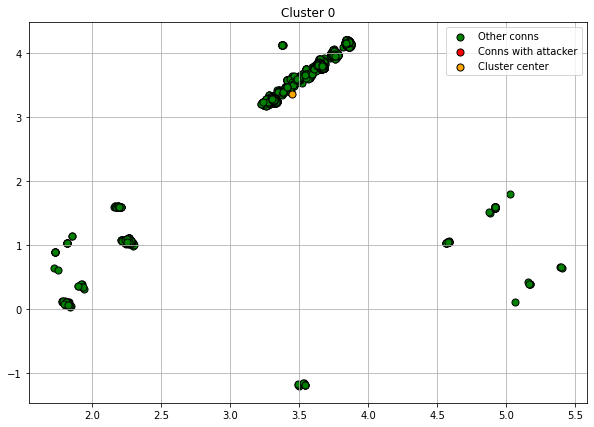

Total num of conns: 5699

Attacker conns ratio:
No    5699
Name: attacker_label, dtype: int64

IPs:
192.168.10.17    1257
192.168.10.14    1184
192.168.10.19     857
192.168.10.15     620
192.168.10.9      525
192.168.10.16     510
192.168.10.5      508
192.168.10.12     226
192.168.10.50      10
192.168.10.8        2
Name: originated_ip, dtype: int64

23.50.75.27       149
178.255.83.1      111
72.21.91.29        97
50.63.243.230      86
23.61.187.27       84
                 ... 
104.16.24.235       1
199.38.164.54       1
23.208.106.113      1
8.18.45.68          1
54.230.38.215       1
Name: responded_ip, Length: 1285, dtype: int64

Time:
timestamp min = 2017-07-04T13:05:00.041415Z
timestamp max = 2017-07-04T13:34:59.612987Z

Cluster 0 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
17519  CIG6Sa4QmOhzr0fiCd            0.53453  192.168.10.17           0.30162   
4220   COcE2G12HwZnFXleBe            0.53453  192.168.10.15           0.88748   
707    Csim4W20Yoh04nmTb8            0.53453   192.168.10.9           0.77061   
16692   C3Z0wAtFlHi68z4Aa            0.53453  192.168.10.14           0.79819   
14774  C3huei23qPh4bXkixj            0.53453  192.168.10.19           0.24079   
8760   CLzNvQ2kyqXVIp9Epl            0.53453  192.168.10.14           0.29570   
279    Ccrbbb25EDXdi2dW41            0.53453  192.168.10.16           0.24085   
2934   Cq836h2c1b4PiPFjDb            0.53453  192.168.10.17           0.30162   
18926  Cx4WR63vAsQgSRuKUj            0.53453   192.168.10.9           0.26894   
4083   CDKfGF2oPlwEkv4QPl            0.53453  192.168.10.19           0.22974   
15701  Co3T0B4WfLoWIjz9Yd            0.53453  192.168.10.14           0.28241   
2223   CfI2aN1ZDC2aRD94Fb            0.53453  192.168.10.17           0.93699   
5935    C0mmE1et4Ry79Y5ga            0.53453  192.168.10.14           0.81448   
3900   CNiY1e1xIF32qbhKzd            0.53453  192.168.10.19           0.10204   
1187   C5fwAG2UFqPbE4VkC9            0.53453  192.168.10.16           0.77061   

          responded_ip                    timestamp  connection.time  \
17519    68.67.178.138  2017-07-04T13:20:47.974413Z          0.52677   
4220   198.232.124.194  2017-07-04T13:10:56.752405Z          0.19824   
707      172.217.10.66   2017-07-04T13:22:54.40519Z          0.59702   
16692     178.255.83.1  2017-07-04T13:09:33.992601Z          0.15225   
14774   54.178.249.132  2017-07-04T13:10:34.148383Z          0.18568   
8760     66.242.15.127  2017-07-04T13:09:33.718289Z          0.15210   
279      54.182.218.19  2017-07-04T13:23:43.208834Z          0.62414   
2934     68.67.178.246   2017-07-04T13:23:51.17171Z          0.62856   
18926     60.250.3.135  2017-07-04T13:31:51.693835Z          0.89558   
4083       52.60.76.61  2017-07-04T13:19:59.612436Z          0.49989   
15701     63.251.98.12  2017-07-04T13:06:07.189491Z          0.03733   
2223   209.242.224.117  2017-07-04T13:27:11.546477Z          0.73991   
5935     182.161.73.86  2017-07-04T13:33:42.140854Z          0.95695   
3900     23.194.140.59  2017-07-04T13:15:04.662257Z          0.33600   
1187     172.217.9.225  2017-07-04T13:05:31.611251Z          0.01756   

       duration  connection.duration protocol service conn_state  \
17519  10.25159              0.00572      tcp     ssl         SF   
4220    4.11951              0.00230      tcp    http         SF   
707     0.59282              0.00033      tcp     ssl         SF   
16692   0.08842              0.00005      tcp    http         SF   
14774   0.19021              0.00011      tcp    none        REJ   
8760   30.75920              0.01718      tcp     ssl         SF   
279    75.21939              0.04200      tcp    http         SF   
2934    5.34563              0.00298      tcp     ssl         SF   
18926   5.47659              0.00306      tcp    none         SF   
4083    0.03018              0.00002      udp     ntp         SF   
15701   1.16480              0.00065      tcp     ssl         SF   
2223    0.03718              0.00002      udp     ntp         SF   
5935   72.06563              0.04024      tcp     ssl         S1   
3900  116.03923              0.06479      tcp     ssl       RSTR   
1187   63.28957              0.03534      tcp    none         SF   

       connection.orig_p  o_port       orig_p_cat  connection.orig_bytes  \
17519            0.78160   51220  orig_reg_or_dyn                0.00644   
4220             0.79864   52336  orig_reg_or_dyn                0.00034   
707              0.05092    3340  orig_reg_or_dyn                0.00061   
16692            0.78884   51694  orig_reg_or_dyn                0.00052   
14774            0.61148   40072  orig_reg_or_dyn                0.00000   
8760             0.78875   

Protocol:
tcp    5138
udp     561
Name: protocol, dtype: int64

Service:
ssl     3426
http    1094
none     633
ntp      518
dns       28
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    5150
orig_well_known     549
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           3605
resp_80            1513
resp_123            518
resp_well_known      45
resp_reg             18
Name: resp_p_cat, dtype: int64




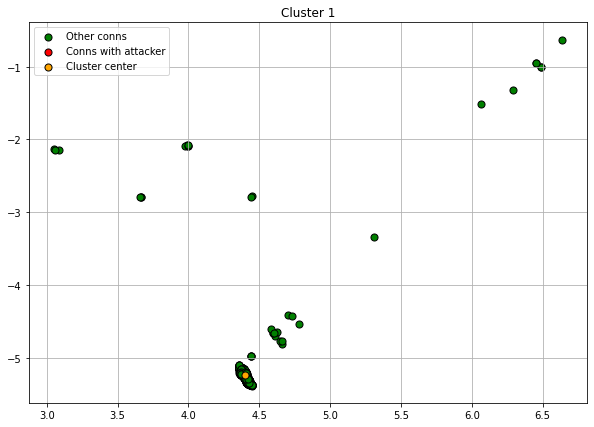

Total num of conns: 4587

Attacker conns ratio:
No    4587
Name: attacker_label, dtype: int64

IPs:
192.168.10.3     4574
192.168.10.50      10
192.168.10.16       3
Name: originated_ip, dtype: int64

192.168.10.1      4554
192.168.10.255      16
144.217.164.10       2
129.6.15.29          2
24.86.68.24          2
224.0.1.24           1
40.70.221.249        1
224.0.0.252          1
65.52.108.186        1
131.253.61.100       1
65.52.108.224        1
207.210.46.249       1
65.52.108.206        1
64.4.54.254          1
131.253.34.230       1
224.0.0.251          1
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-04T13:05:00.001844Z
timestamp max = 2017-07-04T13:34:49.775231Z

Cluster 1 OK sample connections:


uid  originated_ip_num originated_ip  responded_ip_num  \
18503   CMczXWbQslT4nykBb            0.53453  192.168.10.3           0.85944   
12591  CyLK5E1gBOiWqGOjk7            0.53453  192.168.10.3           0.85944   
2514   CRzU6c1LEauraHz1Q9            0.53453  192.168.10.3           0.85944   
12601  CmtA6f45lh6m1PVXka            0.53453  192.168.10.3           0.85944   
5451    CJZiJFwPm4nU5lH5j            0.53453  192.168.10.3           0.85944   
12803  CeQRvX1HymPY4SqCqj            0.53453  192.168.10.3           0.85944   
17255  CTjDta48POoqFZ8kA3            0.53453  192.168.10.3           0.85944   
18595   CnBBXOJjyW30rmM07            0.53453  192.168.10.3           0.85944   
14530  C72r4f4xWBQePdrlqb            0.53453  192.168.10.3           0.85944   
15668  CA4jZC2bTeCL8a6wQ8            0.53453  192.168.10.3           0.85944   
15304  CfvZ8u3QFm7V0jUquh            0.53453  192.168.10.3           0.85944   
16707  C8ki1u4OXElPHJrLLh            0.53453  192.168.10.3           0.85944   
19446  C1HcG01tnlTGDUO4ve            0.53453  192.168.10.3           0.85944   
20344  CoeRgC1xDuokRArpYd            0.53453  192.168.10.3           0.85944   
520    C6paNn4YacknbDrPei            0.53453  192.168.10.3           0.85944   

       responded_ip                    timestamp  connection.time  duration  \
18503  192.168.10.1  2017-07-04T13:17:07.581493Z          0.40430   0.00047   
12591  192.168.10.1  2017-07-04T13:06:52.234187Z          0.06237   0.00070   
2514   192.168.10.1  2017-07-04T13:06:12.810177Z          0.04046   0.25353   
12601  192.168.10.1  2017-07-04T13:33:08.444619Z          0.93823   0.12198   
5451   192.168.10.1  2017-07-04T13:28:21.756948Z          0.77892   0.05410   
12803  192.168.10.1  2017-07-04T13:11:01.584675Z          0.20092   0.02355   
17255  192.168.10.1  2017-07-04T13:10:31.671551Z          0.18430   0.02345   
18595  192.168.10.1  2017-07-04T13:33:08.477675Z          0.93824   0.06136   
14530  192.168.10.1   2017-07-04T13:14:21.01768Z          0.31174   0.03701   
15668  192.168.10.1  2017-07-04T13:33:05.806592Z          0.93676   0.00058   
15304  192.168.10.1  2017-07-04T13:31:09.819123Z          0.87231   0.04964   
16707  192.168.10.1  2017-07-04T13:05:56.675018Z          0.03149   0.07028   
19446  192.168.10.1  2017-07-04T13:14:22.564772Z          0.31260   0.03037   
20344  192.168.10.1  2017-07-04T13:09:45.580753Z          0.15869   0.04997   
520    192.168.10.1  2017-07-04T13:06:09.527143Z          0.03863   0.00049   

       connection.duration protocol service conn_state  connection.orig_p  \
18503              0.00000      udp     dns         SF            0.92664   
12591              0.00000      udp     dns         SF            0.94685   
2514               0.00014      udp     dns         SF            0.94976   
12601              0.00007      udp     dns         SF            0.94628   
5451               0.00003      udp     dns         SF            0.95144   
12803              0.00001      udp     dns         SF            0.93230   
17255              0.00001      udp     dns         SF            0.94036   
18595              0.00003      udp     dns         SF            0.95143   
14530              0.00002      udp     dns         SF            0.94036   
15668              0.00000      udp     dns         SF            0.94466   
15304              0.00003      udp     dns         SF            0.94998   
16707              0.00004      udp     dns         SF            0.94474   
19446              0.00002      udp     dns         SF            0.93470   
20344              0.00003      udp     dns         SF            0.94627   
520                0.00000      udp     dns         SF            0.95303   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
18503   60724  orig_reg_or_dyn                0.00006       53   
12591   62048  orig_reg_or_dyn                0.00006       47   
2514    62239  orig_reg_or_dyn               

Protocol:
udp    4580
tcp       7
Name: protocol, dtype: int64

Service:
dns     4566
none       9
ntp        7
ssl        5
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    4563
orig_well_known      24
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            4554
resp_well_known      17
resp_443              7
resp_123              7
resp_reg              2
Name: resp_p_cat, dtype: int64




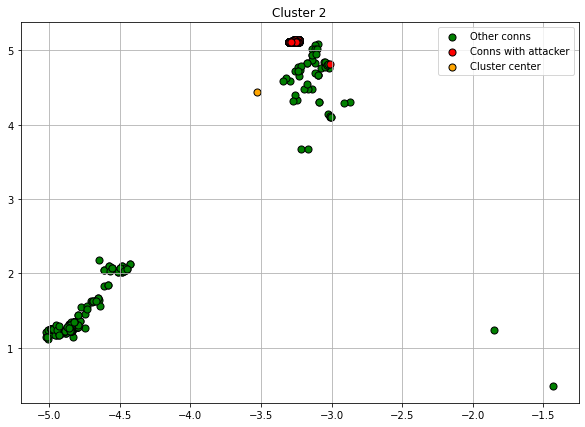

Total num of conns: 1303

Attacker conns ratio:
Yes    1018
No      285
Name: attacker_label, dtype: int64

IPs:
172.16.0.1       1018
192.168.10.25     183
192.168.10.51      54
192.168.10.8       34
192.168.10.12       8
192.168.10.14       2
192.168.10.15       2
210.151.8.24        1
185.49.84.72        1
Name: originated_ip, dtype: int64

192.168.10.50    1072
192.168.10.3      229
192.168.10.16       2
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-04T13:05:00.021444Z
timestamp max = 2017-07-04T13:34:49.774975Z

Cluster 2 NOK sample connections:


uid  originated_ip_num originated_ip  responded_ip_num  \
2729   Cv9XP42isRBZeHn1Q5            0.00000    172.16.0.1           0.85944   
12390  CCRi7f493Ml5297mIa            0.00000    172.16.0.1           0.85944   
9682   CtCWzk4o3UzUX3R1ea            0.00000    172.16.0.1           0.85944   
1975   Cocw7d4uyPw6fo3Yoa            0.00000    172.16.0.1           0.85944   
13003  CI7s3T1TqGkQITkPcf            0.00000    172.16.0.1           0.85944   
12719  CwUsmD2LyiOGNpv0Si            0.00000    172.16.0.1           0.85944   
12650   CFn8ybneo107AQhX1            0.00000    172.16.0.1           0.85944   
8984   CSGbCN26el92pkJHa6            0.00000    172.16.0.1           0.85944   
3953   CyYrxT2baBC6tvRVE2            0.00000    172.16.0.1           0.85944   
8392    CnqelJ7N0kWkxbSFc            0.00000    172.16.0.1           0.85944   
20608  C1ZEWb1VB45TbiXTh5            0.00000    172.16.0.1           0.85944   
12093  CuUFwb1DctwvG5di3l            0.00000    172.16.0.1           0.85944   
7425   Ce3NqK131zpcuMmEf5            0.00000    172.16.0.1           0.85944   
14325  Ch37tq3ZdBIroAd0O3            0.00000    172.16.0.1           0.85944   
17915  CMSeWZ1PxX90YrKeta            0.00000    172.16.0.1           0.85944   

        responded_ip                    timestamp  connection.time  duration  \
2729   192.168.10.50  2017-07-04T13:19:15.998257Z          0.47566   9.50839   
12390  192.168.10.50  2017-07-04T13:10:36.883289Z          0.18720   8.29128   
9682   192.168.10.50  2017-07-04T13:16:50.291146Z          0.39469   9.57011   
1975   192.168.10.50  2017-07-04T13:12:34.534901Z          0.25257   8.80854   
13003  192.168.10.50  2017-07-04T13:05:00.103161Z          0.00006   2.81782   
12719  192.168.10.50   2017-07-04T13:18:11.02744Z          0.43955   7.78943   
12650  192.168.10.50  2017-07-04T13:19:33.798099Z          0.48555   9.64872   
8984   192.168.10.50   2017-07-04T13:17:45.10746Z          0.42515   8.95948   
3953   192.168.10.50  2017-07-04T13:11:37.025063Z          0.22062   8.52966   
8392   192.168.10.50   2017-07-04T13:05:48.94184Z          0.02720   7.74571   
20608  192.168.10.50  2017-07-04T13:14:16.554902Z          0.30926   8.79783   
12093  192.168.10.50  2017-07-04T13:16:44.703099Z          0.39159   8.90544   
7425   192.168.10.50  2017-07-04T13:07:44.018274Z          0.09114   8.91240   
14325  192.168.10.50   2017-07-04T13:11:25.04259Z          0.21396   9.38630   
17915  192.168.10.50  2017-07-04T13:07:06.246852Z          0.07015   9.33629   

       connection.duration protocol service conn_state  connection.orig_p  \
2729               0.00531      tcp     ftp         SF            0.91593   
12390              0.00463      tcp     ftp         SF            0.89807   
9682               0.00534      tcp     ftp         SF            0.91086   
1975               0.00492      tcp     ftp         SF            0.90219   
13003              0.00157      tcp     ftp         SF            0.88663   
12719              0.00435      tcp     ftp         SF            0.91355   
12650              0.00539      tcp     ftp         SF            0.91648   
8984               0.00500      tcp     ftp         SF            0.91272   
3953               0.00476      tcp     ftp         SF            0.90015   
8392               0.00433      tcp     ftp         SF            0.88861   
20608              0.00491      tcp     ftp         SF            0.90564   
12093              0.00497      tcp     ftp         SF            0.91065   
7425               0.00498      tcp     ftp         SF            0.89252   
14325              0.00524      tcp     ftp         SF            0.89978   
17915              0.00521      tcp     ftp         SF            0.89127   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
2729    60022  orig_reg_or_dyn                0.00014      119   
12390   58852  orig_reg_or_dyn                0.00015      126   
9682    59690  orig_reg_or_dy

Cluster 2 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
21091  Cbcr391UcmdMryqpU9            0.53453  192.168.10.25           0.85944   
7414    CWwFWhLA45zee3X9g            0.53453  192.168.10.15           0.85944   
13313   CpHQLfOCcDwQ2ngXj            0.53453  192.168.10.25           0.85944   
6945    CuyR1HDRj0U5kLGJf            0.53453  192.168.10.25           0.85944   
21274  CNEeMp3zyyhouBnSL3            0.53453  192.168.10.25           0.85944   
20755  CWP1DD2swj7Wq9r017            0.53453  192.168.10.25           0.85944   
9277    Cb3ouBlBDyWHedcW8            0.53453  192.168.10.25           0.85944   
3890   CvSoeK35CVy1fqJUMj            0.53453  192.168.10.25           0.85944   
11803  CWqhqA4R0iOhAAaULj            0.53453   192.168.10.8           0.85944   
16086   Co3rVh9q3UmLtIVx7            0.53453  192.168.10.25           0.85944   
20498  C9mZj32WPvyWxWFd8k            0.53453  192.168.10.12           0.85944   
16319   CFDJyECzwGvqLFRj6            0.53453  192.168.10.25           0.85944   
20372  CjVqJ14qzHQXHiV3Zg            0.53453   192.168.10.8           0.85944   
8408   CXwtQY2vqwRynnLf4i            0.53453  192.168.10.25           0.85944   
531    CBBlUe2ISkfEWN5C64            0.53453  192.168.10.25           0.85944   

        responded_ip                    timestamp  connection.time  duration  \
21091  192.168.10.50  2017-07-04T13:05:19.708668Z          0.01095   0.00000   
7414    192.168.10.3  2017-07-04T13:05:23.667055Z          0.01315   0.00022   
13313   192.168.10.3  2017-07-04T13:09:28.994967Z          0.14947 120.86371   
6945    192.168.10.3  2017-07-04T13:18:46.345778Z          0.45918   0.12095   
21274   192.168.10.3  2017-07-04T13:16:19.215922Z          0.37742   0.03127   
20755   192.168.10.3  2017-07-04T13:05:21.139845Z          0.01175   0.08535   
9277    192.168.10.3  2017-07-04T13:12:09.005869Z          0.23839   0.06172   
3890    192.168.10.3  2017-07-04T13:09:31.159409Z          0.15068   0.06231   
11803   192.168.10.3  2017-07-04T13:33:16.957735Z          0.94296   2.20276   
16086   192.168.10.3  2017-07-04T13:18:46.602816Z          0.45932   0.07686   
20498  192.168.10.50  2017-07-04T13:30:38.999668Z          0.85518   1.29889   
16319   192.168.10.3  2017-07-04T13:32:09.059469Z          0.90523   0.12373   
20372   192.168.10.3  2017-07-04T13:33:15.052233Z          0.94190  31.91622   
8408    192.168.10.3  2017-07-04T13:12:01.122193Z          0.23401 118.73123   
531     192.168.10.3  2017-07-04T13:30:49.743468Z          0.86115 100.07035   

       connection.duration protocol  service conn_state  connection.orig_p  \
21091              0.00000      udp      dns        SHR            0.75092   
7414               0.00000      udp      dns         SF            0.80599   
13313              0.06749      tcp     none       RSTR            0.76657   
6945               0.00007      udp      dns         SF            0.87897   
21274              0.00002      udp      dns         SF            0.85475   
20755              0.00005      udp      dns         SF            0.75131   
9277               0.00003      udp      dns         SF            0.84275   
3890               0.00003      udp      dns         SF            0.97775   
11803              0.00123      tcp     none       RSTR            0.78048   
16086              0.00004      udp      dns         SF            0.99458   
20498              0.00073      tcp      ssh         SF            0.86008   
16319              0.00007      udp      dns         SF            0.83680   
20372              0.01782      tcp  dce_rpc         SF            0.78046   
8408               0.06630      tcp     none       RSTR            0.76700   
531                0.05588      tcp     none       RSTR            0.77017   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
21091   49209  orig_reg_or_dyn                0.00000        0   
7414    52818  orig_reg_or_dyn                0.00008       64 

Protocol:
tcp     1091
udp      210
icmp       2
Name: protocol, dtype: int64

Service:
ftp                   1021
dns                    198
none                    42
ssh                     16
gssapi,smb,dce_rpc      10
ftp-data                 4
dce_rpc                  4
ntp                      3
gssapi,ntlm,smb          2
krb_tcp                  2
gssapi,smb,krb           1
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    1287
orig_well_known      16
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_21            1021
resp_53             177
resp_well_known      66
resp_22              16
resp_reg             16
resp_123              3
resp_dyn              3
resp_80               1
Name: resp_p_cat, dtype: int64




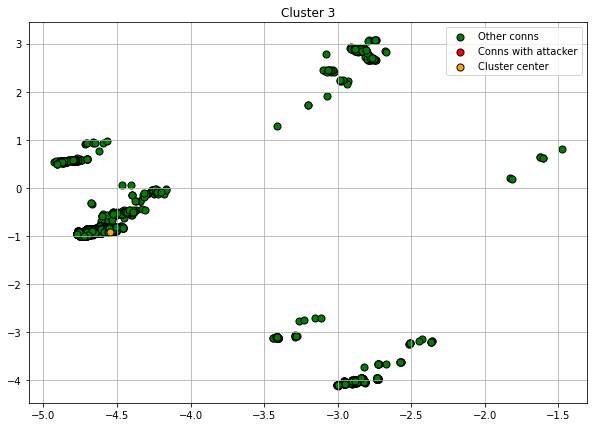

Total num of conns: 8676

Attacker conns ratio:
No    8676
Name: attacker_label, dtype: int64

IPs:
192.168.10.14    1675
192.168.10.17    1565
192.168.10.15    1123
192.168.10.9      945
192.168.10.19     896
192.168.10.5      838
192.168.10.16     613
192.168.10.12     529
192.168.10.50     322
192.168.10.51     158
192.168.10.8       12
Name: originated_ip, dtype: int64

192.168.10.3     8562
192.168.10.50     114
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-04T13:05:00.002093Z
timestamp max = 2017-07-04T13:34:50.950977Z

Cluster 3 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
4643    CtqUWkuIr3afPtKh4            0.53453  192.168.10.15           0.85944   
8043   CNjj7m39dkZVrmvBg6            0.53453  192.168.10.19           0.85944   
18227  CMnxmo3S0wIL0AqAAl            0.53453  192.168.10.17           0.85944   
7916   C8lgY63qdOZZG0IvYi            0.53453  192.168.10.12           0.85944   
1197   C2UdsJ3fh3HkPwCVRh            0.53453  192.168.10.14           0.85944   
14601  CDJ1Pw4aBhA6R64vG8            0.53453   192.168.10.9           0.85944   
8944   Cp6xDC3QwVq8T4yTzl            0.53453  192.168.10.15           0.85944   
14680  ClsuAy45YIxiD1ln8j            0.53453  192.168.10.19           0.85944   
1297    CkcumFGSOXuwDbfhd            0.53453  192.168.10.14           0.85944   
13314  CswOlf1qGRYzRDFBFe            0.53453   192.168.10.9           0.85944   
16318  CIZYwJ16lnB7AnCfB4            0.53453   192.168.10.5           0.85944   
15780  CajYpN2TMDh5mBxe3j            0.53453  192.168.10.16           0.85944   
482     CT7onLSDSjbBv1T4g            0.53453  192.168.10.19           0.85944   
20858  CoiFWp362BsDX3uybd            0.53453  192.168.10.17           0.85944   
14046  CCs1Ev1WlDjGTaos1h            0.53453   192.168.10.9           0.85944   

       responded_ip                    timestamp  connection.time  duration  \
4643   192.168.10.3  2017-07-04T13:14:54.037746Z          0.33009   0.00017   
8043   192.168.10.3  2017-07-04T13:33:05.854054Z          0.93679   0.00028   
18227  192.168.10.3   2017-07-04T13:28:18.69689Z          0.77722   0.04665   
7916   192.168.10.3  2017-07-04T13:27:49.597183Z          0.76105   0.02403   
1197   192.168.10.3  2017-07-04T13:10:08.205758Z          0.17126   0.00013   
14601  192.168.10.3  2017-07-04T13:22:55.070087Z          0.59739   0.00018   
8944   192.168.10.3  2017-07-04T13:11:01.533075Z          0.20089   0.02387   
14680  192.168.10.3  2017-07-04T13:15:09.643105Z          0.33876   0.09305   
1297   192.168.10.3  2017-07-04T13:08:49.819027Z          0.12770   0.00022   
13314  192.168.10.3  2017-07-04T13:13:50.361414Z          0.29471   0.00016   
16318  192.168.10.3  2017-07-04T13:30:03.075575Z          0.83522   0.00023   
15780  192.168.10.3   2017-07-04T13:26:49.52709Z          0.72767   0.02376   
482    192.168.10.3  2017-07-04T13:06:05.670544Z          0.03649   0.06096   
20858  192.168.10.3  2017-07-04T13:28:18.697094Z          0.77722   0.04624   
14046  192.168.10.3  2017-07-04T13:22:59.463867Z          0.59983   0.00019   

       connection.duration protocol service conn_state  connection.orig_p  \
4643               0.00000      udp     dns         SF            0.92081   
8043               0.00000      udp     dns         SF            0.85850   
18227              0.00003      udp     dns         SF            0.22976   
7916               0.00001      udp     dns         SF            0.28099   
1197               0.00000      udp     dns         SF            0.91295   
14601              0.00000      udp     dns         SF            0.87701   
8944               0.00001      udp     dns         SF            0.90677   
14680              0.00005      udp     dns         SF            0.02024   
1297               0.00000      udp     dns         SF            0.81600   
13314              0.00000      udp     dns         SF            0.94906   
16318              0.00000      udp     dns         SF            0.98570   
15780              0.00001      udp     dns         SF            0.63631   
482                0.00003      udp     dns         SF            0.15982   
20858              0.00003      udp     dns         SF            0.77802   
14046              0.00000      udp     dns         SF            0.92003   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
4643    60342  orig_reg_or_dyn                0.00012       98   
8043    56259  orig_reg_or_dyn                0.00010       84   
18227   15059  orig_reg_or_dy

Protocol:
udp    8531
tcp     145
Name: protocol, dtype: int64

Service:
dns               8438
ntp                 62
ssh                 61
none                48
krb                 25
ftp                 10
ftp-data            10
krb_tcp              9
gssapi,smb,krb       8
dce_rpc              5
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    8585
orig_well_known      91
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            8409
resp_well_known     110
resp_22              62
resp_123             62
resp_reg             16
resp_21              10
resp_dyn              7
Name: resp_p_cat, dtype: int64




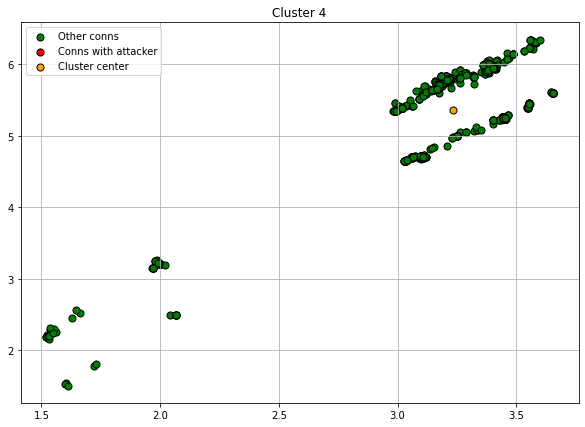

Total num of conns: 1303

Attacker conns ratio:
No    1303
Name: attacker_label, dtype: int64

IPs:
192.168.10.25    578
192.168.10.51    291
192.168.10.12    289
192.168.10.9      60
192.168.10.15     60
192.168.10.16     22
192.168.10.14      2
192.168.10.8       1
Name: originated_ip, dtype: int64

162.213.33.50    59
52.84.134.210    43
114.80.165.63    40
23.61.187.27     28
17.253.20.125    28
                 ..
54.192.38.6       1
172.217.9.225     1
212.77.99.29      1
23.211.130.82     1
52.84.143.243     1
Name: responded_ip, Length: 327, dtype: int64

Time:
timestamp min = 2017-07-04T13:05:00.001203Z
timestamp max = 2017-07-04T13:34:56.111055Z

Cluster 4 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
18355  CVBIdh334QZSa2gCNc            0.53453  192.168.10.12           0.70375   
11104   C090ODEwxjI3L6v35            0.53453  192.168.10.12           0.79792   
4873   CS4QdP3Ehbr480C2Oa            0.53453  192.168.10.25           0.77061   
3267   CtiHZk21eMZOuWGHB9            0.53453  192.168.10.51           0.77061   
13309  CHOddm2CJpwMVsm5i9            0.53453  192.168.10.25           0.10058   
10491  CzY0Zw2AsdyxurVb3j            0.53453  192.168.10.51           0.93358   
20984   CRAvjmFXWaYD0gdCh            0.53453  192.168.10.12           0.47846   
20106  CuNgCf4yg6ovuNRYJj            0.53453  192.168.10.25           0.46218   
18504  CWz9EU3y1QDeQYMYHk            0.53453  192.168.10.25           0.77061   
1023   CoGfSf2sisGWkMbbb8            0.53453  192.168.10.25           0.77061   
20404  CJnFLx1ej4l3kxQx38            0.53453  192.168.10.25           0.77061   
5966   CfVdua1wjFZM09lkS4            0.53453  192.168.10.12           0.67441   
4103    CzhEbuywV8bOKqHof            0.53453  192.168.10.25           0.67441   
7518   CbPELu1FgGttFoBLi5            0.53453  192.168.10.15           0.13474   
10283   CkoIHaaWfefUn6c6d            0.53453  192.168.10.25           0.46217   

          responded_ip                    timestamp  connection.time  \
18355     157.240.2.20  2017-07-04T13:27:48.615379Z          0.76051   
11104  178.239.182.230  2017-07-04T13:27:45.191384Z          0.75860   
4873    172.217.12.206  2017-07-04T13:31:58.853962Z          0.89956   
3267    172.217.10.130  2017-07-04T13:15:48.975284Z          0.36062   
13309      23.111.9.15  2017-07-04T13:16:16.728947Z          0.37604   
10491    209.48.71.122  2017-07-04T13:15:51.811751Z          0.36220   
20984  107.178.245.205  2017-07-04T13:27:51.163373Z          0.76192   
20106     104.17.162.9  2017-07-04T13:25:27.750559Z          0.68223   
18504    172.217.6.206  2017-07-04T13:07:28.290039Z          0.08240   
1023     172.217.9.226  2017-07-04T13:09:33.411717Z          0.15193   
20404      172.217.7.3  2017-07-04T13:19:50.188507Z          0.49466   
5966    151.101.44.134  2017-07-04T13:27:49.166048Z          0.76081   
4103    151.101.44.249  2017-07-04T13:29:51.112713Z          0.82857   
7518       31.13.80.12  2017-07-04T13:05:08.741408Z          0.00486   
10283    104.17.38.113  2017-07-04T13:18:42.323327Z          0.45694   

       duration  connection.duration protocol service conn_state  \
18355 181.35427              0.10126      tcp     ssl         SF   
11104  52.07430              0.02908      tcp     ssl         SF   
4873    2.92414              0.00163      tcp    none         SH   
3267  120.80090              0.06745      tcp     ssl         SF   
13309   0.14208              0.00008      tcp     ssl         SF   
10491 116.96661              0.06531      tcp     ssl       RSTR   
20984   0.72798              0.00041      tcp     ssl         SF   
20106   0.11180              0.00006      tcp     ssl         S1   
18504   0.00000              0.00000      tcp    none         SH   
1023    0.16949              0.00009      tcp     ssl         SF   
20404   0.00000              0.00000      tcp    none         SH   
5966  115.77971              0.06465      tcp     ssl         SF   
4103    0.17976              0.00010      tcp     ssl         SF   
7518  122.16738              0.06822      tcp    none         SF   
10283   2.39431              0.00134      tcp    none         SF   

       connection.orig_p  o_port       orig_p_cat  connection.orig_bytes  \
18355            0.87808   57542  orig_reg_or_dyn                0.00123   
11104            0.53881   35310  orig_reg_or_dyn                0.00467   
4873             0.76593   50193  orig_reg_or_dyn                0.00004   
3267             0.51199   33553  orig_reg_or_dyn                0.00401   
13309            0.76746   50293  orig_reg_or_dyn                0.00110   
10491            0.82267   

Protocol:
tcp    1243
udp      60
Name: protocol, dtype: int64

Service:
ssl     677
none    499
http     72
ntp      36
dns      19
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    1254
orig_well_known      49
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           1056
resp_80             182
resp_123             36
resp_well_known      25
resp_reg              4
Name: resp_p_cat, dtype: int64




In [39]:
for i in range(OPTIMAL_K + 1):
    result_cluster = result.loc[result['cluster'] == i]
    nok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] == 'Yes')]
    ok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'No') | ((result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] != 'Yes'))]
      
    plt.scatter(
        ok_conns[0], ok_conns[1],
        s=50, c='green',
        marker='o', edgecolor='black',
        label='Other conns'
    )
    
    plt.scatter(
        nok_conns[0], nok_conns[1],
        s=50, c='red',
        marker='o', edgecolor='black',
        label='Conns with attacker'
    )
    
    plt.scatter(
        kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='Cluster center'
    )
    
    plt.legend(scatterpoints=1)
    plt.title('Cluster ' + str(i))
    plt.grid()
    plt.show()
    
    print('Total num of conns: ' + str(result_cluster.shape[0]) + '\n')
    
    
    print('Attacker conns ratio:')
    print_df_func(result_cluster, 'attacker_label', 'count')
    
    print('IPs:')
    print_df_func(result_cluster, 'originated_ip', 'count')
    print_df_func(result_cluster, 'responded_ip', 'count')
    
    print('Time:')
    print_df_func(result_cluster, 'timestamp', 'min')
    print_df_func(result_cluster, 'timestamp', 'max')

    if len(nok_conns) > 0:
        print('Cluster ' + str(i) + ' NOK sample connections:')
        samples = nok_conns.sample(15 if len(nok_conns) >= 15 else len(nok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    if len(ok_conns) > 0:
        print('Cluster ' + str(i) + ' OK sample connections:')
        samples = ok_conns.sample(15 if len(ok_conns) >= 15 else len(ok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    print('Protocol:')
    print_df_func(result_cluster, 'protocol', 'count')
    
    print('Service:')
    print_df_func(result_cluster, 'service', 'count')
    
    print('Orig_p_cat:')
    print_df_func(result_cluster, 'orig_p_cat', 'count')
    
    print('Resp_p_cat:')
    print_df_func(result_cluster, 'resp_p_cat', 'count')
    
    print('  ================================================  \n')
    

## Evaluation

**Rand index** *can't be used, requires labels.. (https://scikit-learn.org/stable/modules/clustering.html#rand-index)*


Notation: set `S = {1, 2, .. n}` of `x > 2` points, distance function `d(i,j)` measures distance between 2 points from S (d can be Euclidean, Manhattan, Chebyshev, Mahalanobis, .. alternatively similarity function can be used)


#### 3 axioms of Jon Kleinberg: 

- characteristics that a grouping problem shuld exhibit and can be considered "good", independently of alg used to find solution

1. **scale invariance**: `f(d) == f(alfa*d)` for any d and alfa > 0

2. **consistency**: if for every (i,j) from same cluster `d(i,j) >= d'(i,j)` and from different clusters `d(i,j) < d'(i,j)` then `f(d) == f(d')`

3. **wealth, richness**: every partition of S is a possible result of the clustering process

For every n >= 2 there is no clustering alg. that satysfies all three at once. 

2 measure of internal metrics: 

**cohesion** = between points in same cluster

**separation** = between points from different clusters



### Sum of Squared Error (SSE) 

(https://stackoverflow.com/questions/43784903/scikit-k-means-clustering-performance-measure)

Elbow Criterion 

- not available as a function in Scikit (we need to calculate SSE to evaluate K-Means using Elbow Criterion)

**Idea of Elbow Criterion method: choose `k` (number of cluster) at which the SSE decreases abruptly.**

(Small values indicate good quality.)

SSE = sum of squared distance between each member of the cluster and its centroid

SSE tends to decrease toward 0 as we increase k (SSE=0, when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster).

=> goal: choose a small value of k that still has a low SSE, and the elbow usually represents, where we start to have diminishing returns by increasing k

If the line graph looks like an arm, the "elbow" on the arm is the value of optimal k (number of cluster). 

## Metrics that quantify level of separation and cohesion in a single measure:

### Silhouette Score

- used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other
- is calculated for each sample of different clusters
- to calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters: Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a. Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

Silhouette score, S, for each sample is calculated using the following formula:

```
Silhouette Score = (average intra-cluster distance - average inter-cluster distance) / 
                   max(average inter-cluster distance, average intra-cluster distance)

```

- intra-cluster distance = average distance between each point within a cluster
- inter-cluster distance = average distance between all clusters

Value of Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.

Single pass eval:

In [40]:
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics

sse = {}
sil = {}
ch = {}
db = {}

from sklearn.cluster import KMeans
from sklearn import metrics

for k in range(2, len(computed_clusters)):
# for k in range(OPTIMAL_K, OPTIMAL_K + 1):
    print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
    
    km = computed_clusters[k]
    km_fit = computed_clusters_fitted[k]
    
    print('K=' + str(k + 1) + ' clusters: ')
    
    sse_score = km_fit.inertia_   
    sse[k] = sse_score
    print('Sum of Squared Error for k = ' + str(k + 1) + ': ' + str(sse_score))
    
    ch_score = metrics.calinski_harabasz_score(pca_X, km_fit.labels_)
    ch[k] = ch_score
    print('Calisnki-Harabasz Coefficient for k = ' + str(k + 1) + ': ' + str(ch_score))
    
    db_score = davies_bouldin_score(pca_X, km_fit.labels_)
    db[k] = db_score
    print('Davies-Bouldin Index for k = ' + str(k + 1) + ': ' + str(db_score))
    
    sil_score = metrics.silhouette_score(pca_X, km.labels_, metric='euclidean')
    sil[k] = sil_score
    print('Silhouette Score for k = ' + str(k + 1) + ': ' + str(sil_score))
    
    print('End at ' + datetime.now().strftime("%H:%M:%S") + '.')
    
    print('--')

Start at 00:08:31.
K=3 clusters: 
Sum of Squared Error for k = 3: 332001.62504836626
Calisnki-Harabasz Coefficient for k = 3: 18959.806606296
Davies-Bouldin Index for k = 3: 0.7700468846685378
Silhouette Score for k = 3: 0.5846866706474836
End at 00:08:41.
--
Start at 00:08:41.
K=4 clusters: 
Sum of Squared Error for k = 4: 238133.88161160817
Calisnki-Harabasz Coefficient for k = 4: 19600.992502967394
Davies-Bouldin Index for k = 4: 0.6391586830320205
Silhouette Score for k = 4: 0.6327189631432458
End at 00:08:51.
--
Start at 00:08:51.
K=5 clusters: 
Sum of Squared Error for k = 5: 195526.59857360928
Calisnki-Harabasz Coefficient for k = 5: 22612.071902519045
Davies-Bouldin Index for k = 5: 0.7937924001940863
Silhouette Score for k = 5: 0.6684534149171627
End at 00:09:01.
--
Start at 00:09:01.
K=6 clusters: 
Sum of Squared Error for k = 6: 171515.03930294333
Calisnki-Harabasz Coefficient for k = 6: 21224.91786276624
Davies-Bouldin Index for k = 6: 0.9430001925770098
Silhouette Score fo

In [41]:
sse

{2: 332001.62504836626,
 3: 238133.88161160817,
 4: 195526.59857360928,
 5: 171515.03930294333,
 6: 156167.13220641576,
 7: 151011.67340609076,
 8: 129728.90926822164,
 9: 125927.12947268436,
 10: 123961.00384404436,
 11: 111551.02331518133,
 12: 109567.76484814667,
 13: 94008.56227851665,
 14: 92068.21116850887,
 15: 89121.73778492931,
 16: 87423.1650799366,
 17: 81889.49642435656,
 18: 83095.68854810146,
 19: 82121.79460213169,
 20: 80928.6775347618,
 21: 77183.13045327856,
 22: 72237.08247872927,
 23: 72070.2323981198}

In [42]:
ch

{2: 18959.806606296,
 3: 19600.992502967394,
 4: 22612.071902519045,
 5: 21224.91786276624,
 6: 19777.397875674407,
 7: 16486.10471025522,
 8: 17008.733503722884,
 9: 15610.960795484692,
 10: 13705.729825942188,
 11: 15831.936969498145,
 12: 14806.26480420236,
 13: 16145.130057574888,
 14: 15337.410609193894,
 15: 14831.624297944481,
 16: 14208.391850579439,
 17: 14375.946565473043,
 18: 13331.812664606845,
 19: 12847.710073148432,
 20: 12240.71045178411,
 21: 12315.52769771461,
 22: 12621.868646075536,
 23: 12102.279837882912}

In [43]:
db

{2: 0.7700468846685378,
 3: 0.6391586830320205,
 4: 0.7937924001940863,
 5: 0.9430001925770098,
 6: 0.9528571704642905,
 7: 1.144439750499673,
 8: 1.0753390631248285,
 9: 1.2328600503902598,
 10: 1.2223649364870839,
 11: 1.2422923455583907,
 12: 1.2175320872101514,
 13: 1.1491597271346816,
 14: 1.184194412384428,
 15: 1.2101315963190413,
 16: 1.2972403892376982,
 17: 1.1556855078011745,
 18: 1.1448259365425273,
 19: 1.1728355539229216,
 20: 1.2842808318501493,
 21: 1.2703079268999762,
 22: 1.2054127736367741,
 23: 1.2176304823459285}

In [44]:
sil

{2: 0.5846866706474836,
 3: 0.6327189631432458,
 4: 0.6684534149171627,
 5: 0.6365932901303024,
 6: 0.6211095010292572,
 7: 0.6141533725332716,
 8: 0.6245643322751326,
 9: 0.44740386339348154,
 10: 0.43920671471832906,
 11: 0.45846212472494924,
 12: 0.4739214434800562,
 13: 0.49381017660725157,
 14: 0.39297464501879203,
 15: 0.39909987949235004,
 16: 0.4007301029932634,
 17: 0.4179880312239136,
 18: 0.42813707598954936,
 19: 0.40109135108132266,
 20: 0.37653110099949333,
 21: 0.382607014062587,
 22: 0.38646410407868886,
 23: 0.3653427444002262}

In [45]:
# 1: clusters are clearly distinguished
# 0: distance between clusters is not significant ('data are uniformly distributed throughout Euclidean space')
# -1: clusters are assigned the wrong way

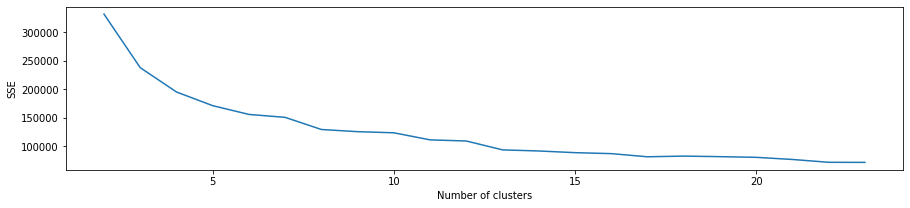

In [46]:
# import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,3)
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [47]:
# plt.rcParams["figure.figsize"] = (15,3)
# plt.figure()
# sse_to_10 = { k: v for k, v in sse.items() if k <= 10 }  # zoom in
# plt.plot(list(sse_to_10.keys()), list(sse_to_10.values()))
# plt.xlabel("Number of clusters")
# plt.ylabel("SSE")
# plt.show()

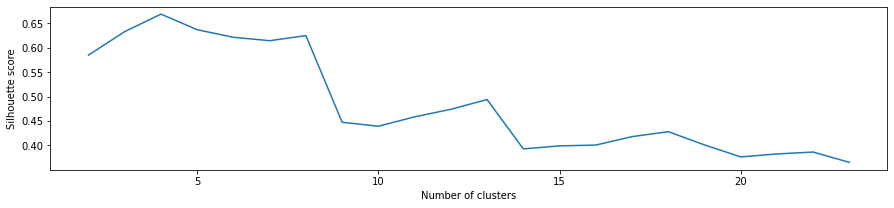

In [48]:
plt.rcParams["figure.figsize"] = (15,3)
plt.figure()
plt.plot(list(sil.keys()), list(sil.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

## Interpretation

Parallel coordinates plots.

In [49]:
features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                     'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

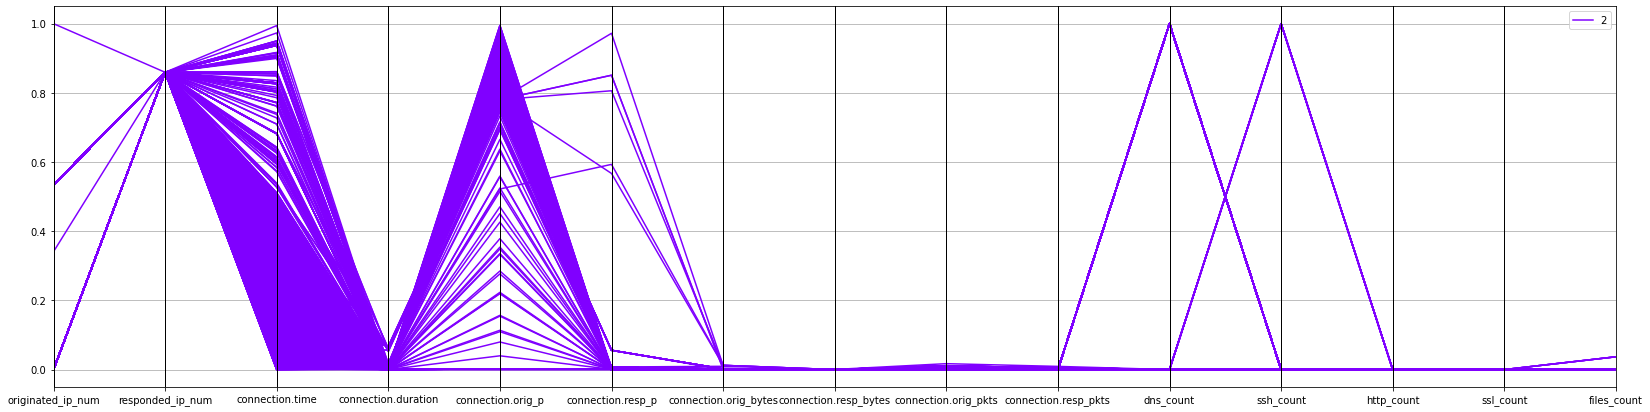

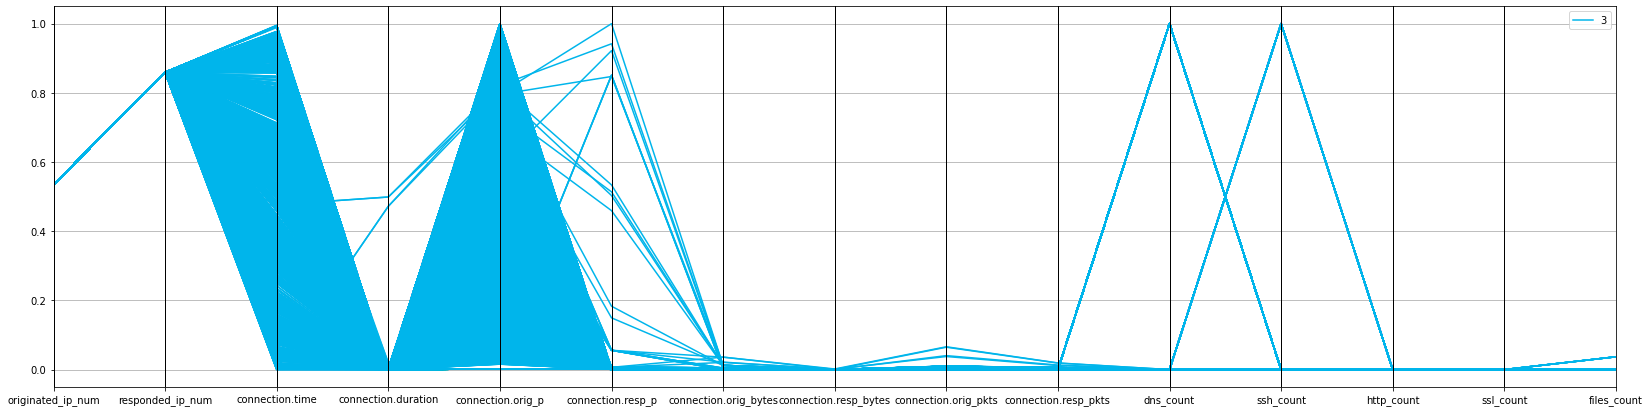

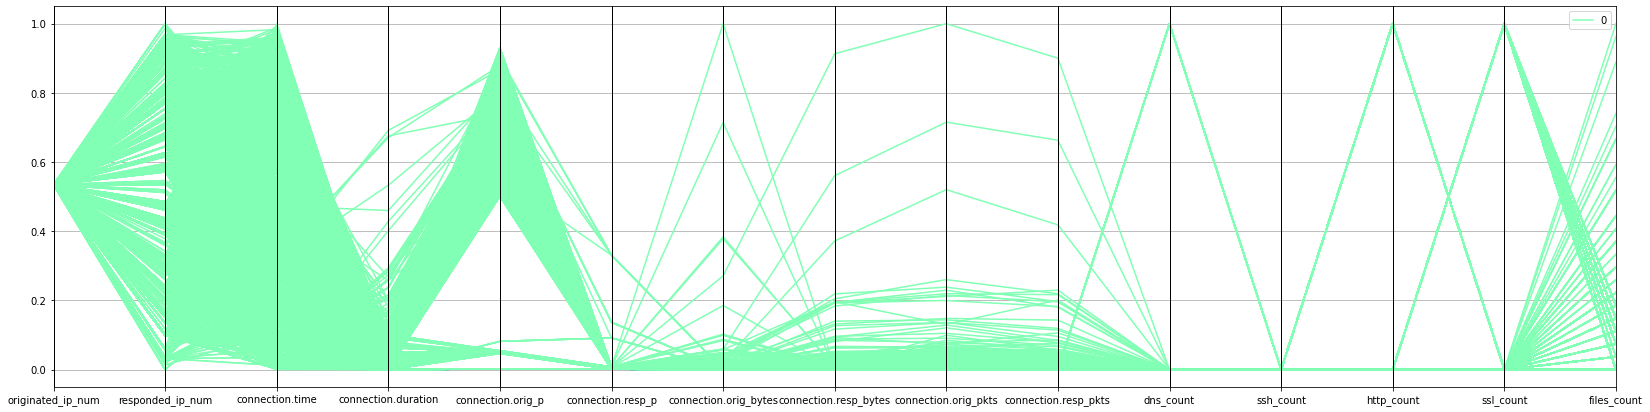

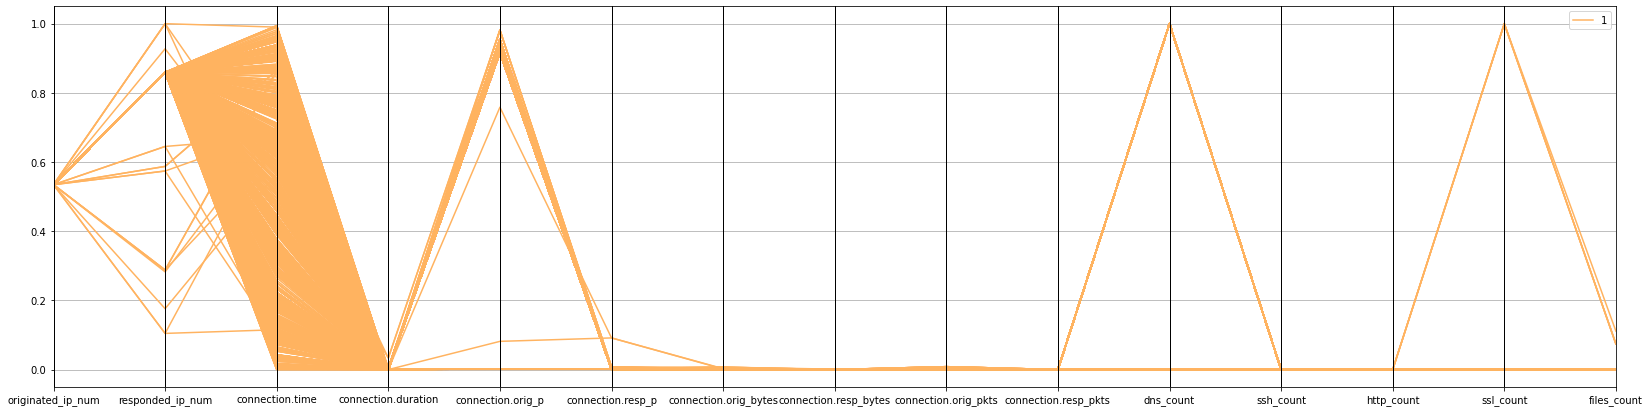

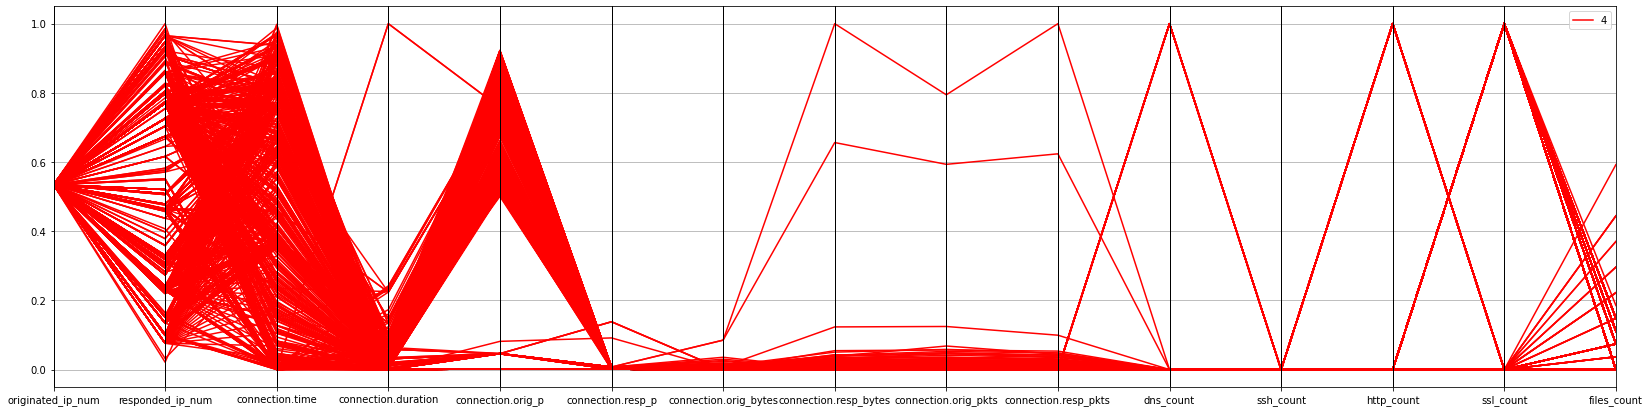

In [50]:
import pandas as pd

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (28,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()

With dominant neighbourhood:

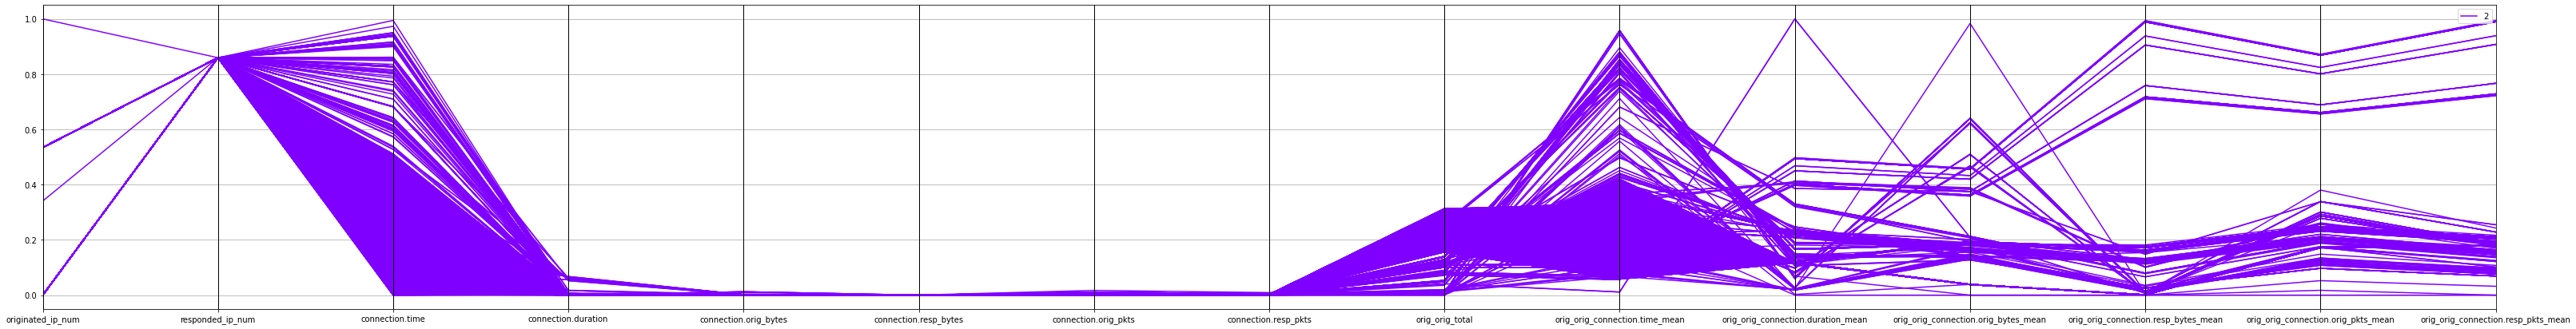

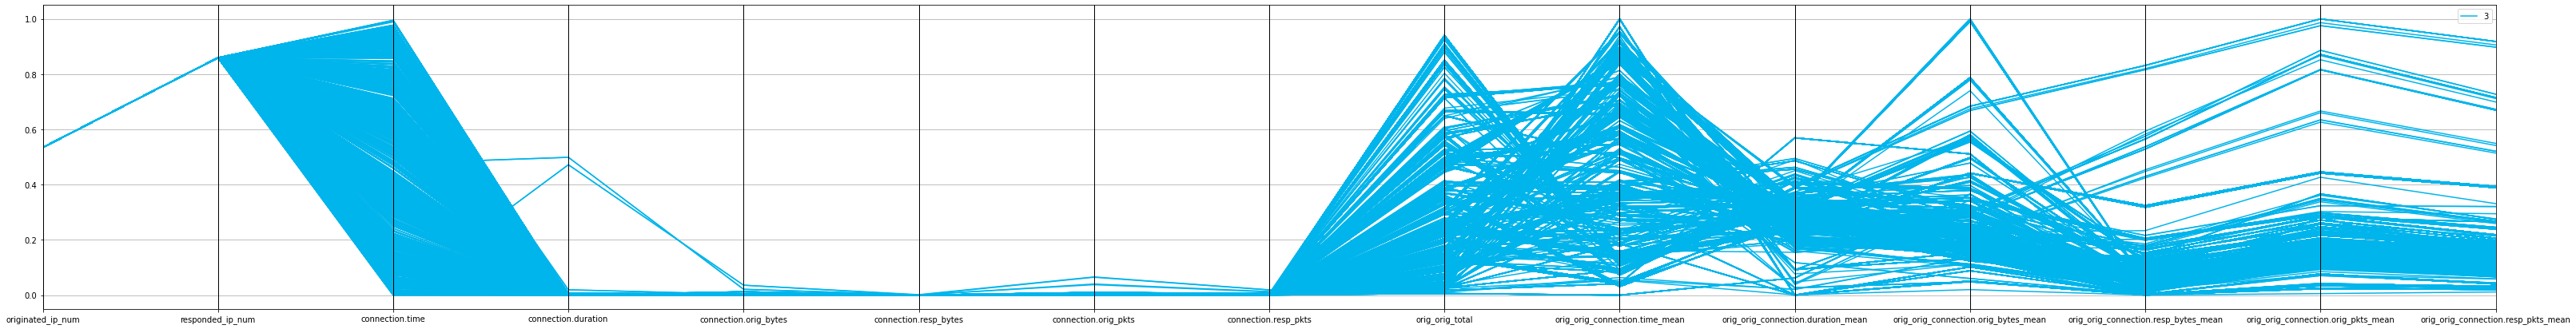

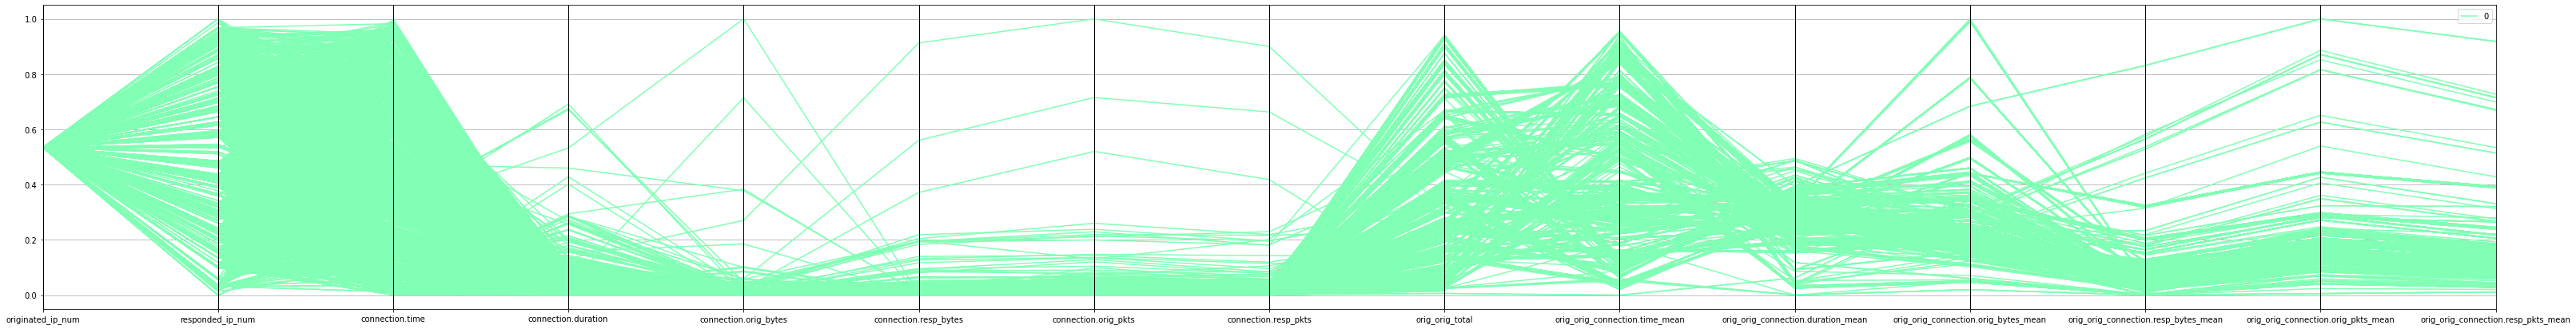

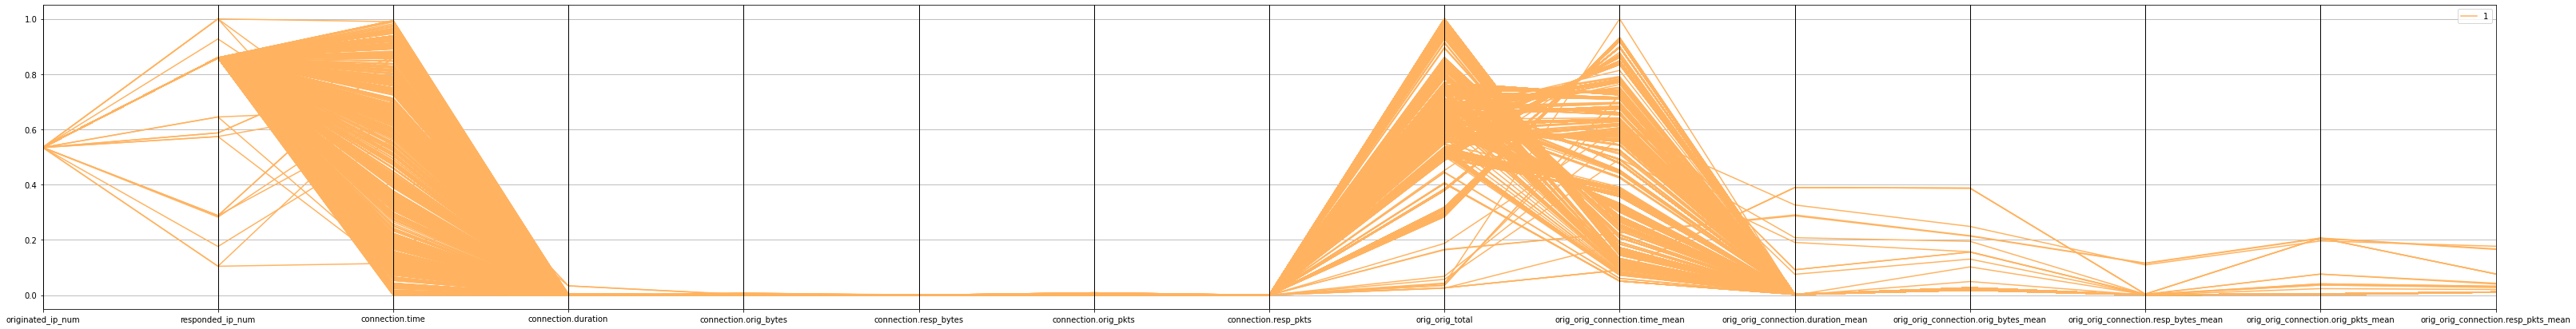

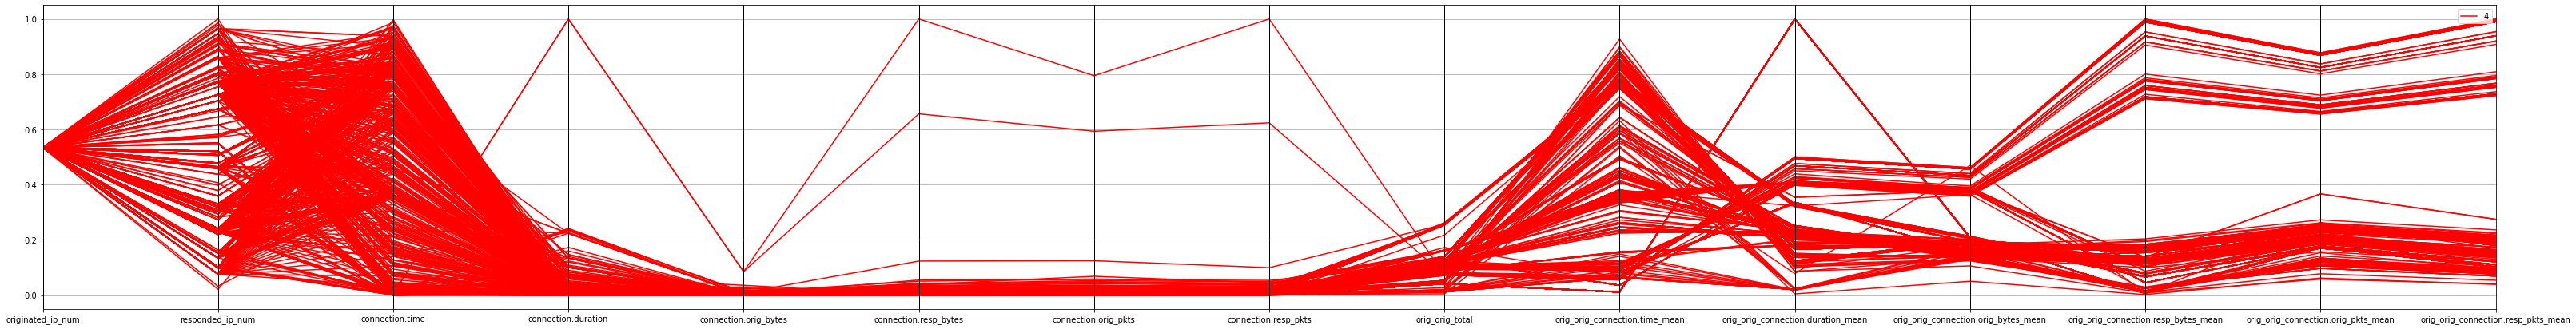

In [51]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean',
                       'attacker_label', 'victim_label']

labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)

features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     #'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                        'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.resp_pkts_mean']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (55,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()